In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder, MinMaxScaler
from sklearn import metrics
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn import tree

import seaborn as sns


In [2]:
df_1_features = pd.read_csv("Features data set.csv", encoding = "UTF-8")
df_2_sales = pd.read_csv("sales data-set.csv", encoding = "UTF-8")
df_3_tabla = pd.read_csv("Tabla_1.csv", encoding = "UTF-8", index_col=[0])

In [3]:
print(df_1_features)

      Store        Date  Temperature  Fuel_Price  MarkDown1  MarkDown2  \
0         1  05/02/2010        42.31       2.572        NaN        NaN   
1         1  12/02/2010        38.51       2.548        NaN        NaN   
2         1  19/02/2010        39.93       2.514        NaN        NaN   
3         1  26/02/2010        46.63       2.561        NaN        NaN   
4         1  05/03/2010        46.50       2.625        NaN        NaN   
...     ...         ...          ...         ...        ...        ...   
8185     45  28/06/2013        76.05       3.639    4842.29     975.03   
8186     45  05/07/2013        77.50       3.614    9090.48    2268.58   
8187     45  12/07/2013        79.37       3.614    3789.94    1827.31   
8188     45  19/07/2013        82.84       3.737    2961.49    1047.07   
8189     45  26/07/2013        76.06       3.804     212.02     851.73   

      MarkDown3  MarkDown4  MarkDown5         CPI  Unemployment  IsHoliday  
0           NaN        NaN        

In [4]:
print(df_2_sales)

        Store  Dept        Date  Weekly_Sales  IsHoliday
0           1     1  05/02/2010      24924.50      False
1           1     1  12/02/2010      46039.49       True
2           1     1  19/02/2010      41595.55      False
3           1     1  26/02/2010      19403.54      False
4           1     1  05/03/2010      21827.90      False
...       ...   ...         ...           ...        ...
421565     45    98  28/09/2012        508.37      False
421566     45    98  05/10/2012        628.10      False
421567     45    98  12/10/2012       1061.02      False
421568     45    98  19/10/2012        760.01      False
421569     45    98  26/10/2012       1076.80      False

[421570 rows x 5 columns]


In [5]:
print(df_3_tabla)

    Store  Dept        Date   Weekly_Sales  IsHoliday_x  Temperature  \
0       5    16  16/09/2011  564312.734549        False    32.687061   
1      21    52  24/06/2011  169199.146654        False    59.608361   
2       9    24  27/01/2012   76445.807545        False    16.623822   
3       6    60  05/08/2011  529384.632399        False    36.466380   
4      17    42  23/12/2011  590421.125970        False    92.396503   
5      31    87  24/08/2012  556894.615504        False    43.412585   
6      21    83  19/03/2010  682722.852234        False    52.963927   
7       4    29  30/09/2011   70387.018913        False    74.145519   
8      20    16  24/12/2010  326232.854841        False    26.041172   
9      22    46  27/05/2011  436981.323825        False    28.162576   
10      3    10  01/06/2012  262010.005704        False    87.287100   
11     40    52  30/09/2011  244885.308147        False    32.901161   
12     15    67  04/02/2011  597439.476292        False    13.86

In [6]:
# En df1 y df2 se repiten columnas "Date", "IsHoliday"  y "Store", estas serán utilizadas para unir los df1 y df2
# Se apuntará a dejar las columnas que se muestran en el df3 que corresponde a la tabla que se debe usar en las predicciones.

In [7]:
df_1_features.isna().sum()

Store              0
Date               0
Temperature        0
Fuel_Price         0
MarkDown1       4158
MarkDown2       5269
MarkDown3       4577
MarkDown4       4726
MarkDown5       4140
CPI              585
Unemployment     585
IsHoliday          0
dtype: int64

In [8]:
df_1_features.describe(include="all")

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
count,8190.000000,8190,8190.000000,8190.000000,4032.000000,2921.000000,3613.000000,3464.000000,4050.000000,7605.000000,7605.000000,8190
unique,NaN,182,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
top,NaN,04/03/2011,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
freq,NaN,45,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7605
mean,23.000000,NaN,59.356198,3.405992,7032.371786,3384.176594,1760.100180,3292.935886,4132.216422,172.460809,7.826821,NaN
std,12.987966,NaN,18.678607,0.431337,9262.747448,8793.583016,11276.462208,6792.329861,13086.690278,39.738346,1.877259,NaN
min,1.000000,NaN,-7.290000,2.472000,-2781.450000,-265.760000,-179.260000,0.220000,-185.170000,126.064000,3.684000,NaN
25%,12.000000,NaN,45.902500,3.041000,1577.532500,68.880000,6.600000,304.687500,1440.827500,132.364839,6.634000,NaN
50%,23.000000,NaN,60.710000,3.513000,4743.580000,364.570000,36.260000,1176.425000,2727.135000,182.764003,7.806000,NaN
75%,34.000000,NaN,73.880000,3.743000,8923.310000,2153.350000,163.150000,3310.007500,4832.555000,213.932412,8.567000,NaN


In [9]:
df_2_sales.isna().sum()

Store           0
Dept            0
Date            0
Weekly_Sales    0
IsHoliday       0
dtype: int64

In [10]:
df_2_sales.describe(include="all")

,Store,Dept,Date,Weekly_Sales,IsHoliday
count,421570.000000,421570.000000,421570,421570.000000,421570
unique,NaN,NaN,143,NaN,2
top,NaN,NaN,23/12/2011,NaN,False
freq,NaN,NaN,3027,NaN,391909
mean,22.200546,44.260317,NaN,15981.258123,NaN
std,12.785297,30.492054,NaN,22711.183519,NaN
min,1.000000,1.000000,NaN,-4988.940000,NaN
25%,11.000000,18.000000,NaN,2079.650000,NaN
50%,22.000000,37.000000,NaN,7612.030000,NaN
75%,33.000000,74.000000,NaN,20205.852500,NaN


In [11]:
df_3_tabla.describe(include="all")

,Store,Dept,Date,Weekly_Sales,IsHoliday_x,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday_y
count,50.000000,50.000000,50,50.000000,50,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50
unique,NaN,NaN,42,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
top,NaN,NaN,23/12/2011,NaN,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
freq,NaN,NaN,2,NaN,49,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,49
mean,23.000000,41.180000,NaN,311881.166051,NaN,53.860291,3.410660,46823.431738,22639.282088,18694.939255,10694.782423,10883.580305,170.399624,7.786860,NaN
std,12.748749,30.161937,NaN,200149.261403,NaN,32.810056,0.379839,28695.800590,15587.848802,10149.652571,6399.756015,6220.437869,39.681079,1.985656,NaN
min,3.000000,2.000000,NaN,11877.665598,NaN,-0.149522,2.720000,166.671403,464.157260,233.535025,348.902159,405.051798,126.208548,4.145000,NaN
25%,11.000000,16.250000,NaN,154829.287341,NaN,27.754418,3.142000,17566.715113,7016.254677,9755.597789,4983.073330,5240.451037,132.856661,6.628750,NaN
50%,23.000000,31.000000,NaN,244411.544868,NaN,53.154975,3.434500,53725.974939,22039.237903,19015.169457,10407.273632,11535.964587,141.409535,7.520500,NaN
75%,34.000000,59.750000,NaN,500367.379137,NaN,84.572924,3.672500,72073.894875,33955.983194,26062.501079,15723.423856,16845.957447,210.714492,8.799500,NaN


In [12]:
# Se unen los df usando las columnas Store, Date y IsHoliday.
# Se asume que las columnas Markdown, CPI, Unemployment son iguales para cada Dept
df_1_2 = pd.merge(df_1_features, df_2_sales, left_on=["Store", "Date", "IsHoliday"], right_on=["Store", "Date", "IsHoliday"])
# Se ordena el data frame de acuerdo a Dept y Store, además se reinician el índice, para que se muestre como salía en el "PasoAPasoMiniproyecto2 parte 1"
df_1_2.sort_values(by=["Dept", "Store"], inplace=True)
df_1_2.reset_index(inplace=True, drop=True)

df_1_2.head(10)

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday,Dept,Weekly_Sales
0,1,05/02/2010,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,1,24924.50
1,1,12/02/2010,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True,1,46039.49
2,1,19/02/2010,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False,1,41595.55
3,1,26/02/2010,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False,1,19403.54
4,1,05/03/2010,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False,1,21827.90
5,1,12/03/2010,57.79,2.667,NaN,NaN,NaN,NaN,NaN,211.380643,8.106,False,1,21043.39
6,1,19/03/2010,54.58,2.720,NaN,NaN,NaN,NaN,NaN,211.215635,8.106,False,1,22136.64
7,1,26/03/2010,51.45,2.732,NaN,NaN,NaN,NaN,NaN,211.018042,8.106,False,1,26229.21
8,1,02/04/2010,62.27,2.719,NaN,NaN,NaN,NaN,NaN,210.820450,7.808,False,1,57258.43
9,1,09/04/2010,65.86,2.770,NaN,NaN,NaN,NaN,NaN,210.622857,7.808,False,1,42960.91


In [13]:
# Se chequea el número filas y columnas del data frame para verificar que no se perdió información en la unión.
# Las filas son 421.570, la misma cantidad que tiene el df2. Esto quiere decir que no se perdió información al hacer el merge de tipo
# inner, lo que indica que las columnas "Date", "Store", "IsHoliday" tenían la misma información en ambos dataframes originales, 
# si hubieran sido distintas, los datos que no pertenecen a la intersección hubieran quedado afuera produciendo un número de filas menor.
df_1_2.shape

(421570, 14)

In [14]:
print(df_1_2.columns)
print(df_3_tabla.columns)
# Se observa que están presentes las mismas columnas en el df_1_2 y el df de la tabla a probar, con excepción de que la tabla
# a probar tiene dos columnas "IsHoliday", por lo que se verificará si son iguales y en caso de serlo se eliminará una copia.

Index(['Store', 'Date', 'Temperature', 'Fuel_Price', 'MarkDown1', 'MarkDown2',
       'MarkDown3', 'MarkDown4', 'MarkDown5', 'CPI', 'Unemployment',
       'IsHoliday', 'Dept', 'Weekly_Sales'],
      dtype='object')
Index(['Store', 'Dept', 'Date', 'Weekly_Sales', 'IsHoliday_x', 'Temperature',
       'Fuel_Price', 'MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4',
       'MarkDown5', 'CPI', 'Unemployment', 'IsHoliday_y'],
      dtype='object')


In [15]:
df_3_tabla["IsHoliday_x"].equals(df_3_tabla["IsHoliday_y"])

True

In [16]:
# Como son iguales se elimina una copia y se cambia el nombre de la que queda.

In [17]:
df_3_tabla.drop(["IsHoliday_y"], inplace=True, axis=1)
df_3_tabla.rename(columns={"IsHoliday_x": "IsHoliday"}, inplace=True)

In [18]:
print(df_1_2.columns)
print(df_3_tabla.columns)


Index(['Store', 'Date', 'Temperature', 'Fuel_Price', 'MarkDown1', 'MarkDown2',
       'MarkDown3', 'MarkDown4', 'MarkDown5', 'CPI', 'Unemployment',
       'IsHoliday', 'Dept', 'Weekly_Sales'],
      dtype='object')
Index(['Store', 'Dept', 'Date', 'Weekly_Sales', 'IsHoliday', 'Temperature',
       'Fuel_Price', 'MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4',
       'MarkDown5', 'CPI', 'Unemployment'],
      dtype='object')


In [19]:
# Se observa que los nombres de las columnas son iguales, por lo que se procederá a almacenar df_1_2 en una nueva variable que tiene las columnas ordenadas
# igual que en el df de la tabla a probar.
df_final = df_1_2.copy()
df_final = df_final[df_3_tabla.columns.values]

In [20]:
df_final

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment
0,1,1,05/02/2010,24924.50,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106
1,1,1,12/02/2010,46039.49,True,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106
2,1,1,19/02/2010,41595.55,False,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106
3,1,1,26/02/2010,19403.54,False,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106
4,1,1,05/03/2010,21827.90,False,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
421565,43,99,18/11/2011,50.00,False,57.75,3.308,32.13,3.37,2.56,NaN,1004.04,209.865107,10.148
421566,43,99,06/01/2012,25.00,False,47.59,3.157,32.95,1699.03,70.35,NaN,1168.66,211.242813,9.653
421567,43,99,15/06/2012,5.00,False,87.75,3.393,402.48,NaN,0.65,NaN,1315.66,213.178695,9.575
421568,44,99,05/03/2010,0.01,False,40.65,2.681,NaN,NaN,NaN,NaN,NaN,126.578286,8.119


In [21]:
# A continuación se procederá a depurar el dataframe que contiene los datos (de aquí en adelante será referido como df_final). Para comenzar se realiza un .describe
# y se observa que las columnas MarkDown son las únicas que no tienen 421.570 datos.
df_final.describe(include="all")

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment
count,421570.000000,421570.000000,421570,421570.000000,421570,421570.000000,421570.000000,150681.000000,111248.000000,137091.000000,134967.000000,151432.000000,421570.000000,421570.000000
unique,NaN,NaN,143,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,23/12/2011,NaN,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,3027,NaN,391909,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,22.200546,44.260317,NaN,15981.258123,NaN,60.090059,3.361027,7246.420196,3334.628621,1439.421384,3383.168256,4628.975079,171.201947,7.960289
std,12.785297,30.492054,NaN,22711.183519,NaN,18.447931,0.458515,8291.221345,9475.357325,9623.078290,6292.384031,5962.887455,39.159276,1.863296
min,1.000000,1.000000,NaN,-4988.940000,NaN,-2.060000,2.472000,0.270000,-265.760000,-29.100000,0.220000,135.160000,126.064000,3.879000
25%,11.000000,18.000000,NaN,2079.650000,NaN,46.680000,2.933000,2240.270000,41.600000,5.080000,504.220000,1878.440000,132.022667,6.891000
50%,22.000000,37.000000,NaN,7612.030000,NaN,62.090000,3.452000,5347.450000,192.000000,24.600000,1481.310000,3359.450000,182.318780,7.866000
75%,33.000000,74.000000,NaN,20205.852500,NaN,74.280000,3.738000,9210.900000,1926.940000,103.990000,3595.040000,5563.800000,212.416993,8.572000


In [22]:
# Se calcula cuántos datos faltan en cada columna.
df_final.isna().sum()

Store                0
Dept                 0
Date                 0
Weekly_Sales         0
IsHoliday            0
Temperature          0
Fuel_Price           0
MarkDown1       270889
MarkDown2       310322
MarkDown3       284479
MarkDown4       286603
MarkDown5       270138
CPI                  0
Unemployment         0
dtype: int64

In [23]:
print(f"El procentaje de datos faltantes en MarkDown1 es: {round(df_final['MarkDown1'].isna().sum()/len(df_final)*100,2)}")
print(f"El procentaje de datos faltantes en MarkDown2 es: {round(df_final['MarkDown2'].isna().sum()/len(df_final)*100,2)}")
print(f"El procentaje de datos faltantes en MarkDown3 es: {round(df_final['MarkDown3'].isna().sum()/len(df_final)*100,2)}")
print(f"El procentaje de datos faltantes en MarkDown4 es: {round(df_final['MarkDown4'].isna().sum()/len(df_final)*100,2)}")
print(f"El procentaje de datos faltantes en MarkDown5 es: {round(df_final['MarkDown5'].isna().sum()/len(df_final)*100,2)}")


El procentaje de datos faltantes en MarkDown1 es: 64.26
El procentaje de datos faltantes en MarkDown2 es: 73.61
El procentaje de datos faltantes en MarkDown3 es: 67.48
El procentaje de datos faltantes en MarkDown4 es: 67.98
El procentaje de datos faltantes en MarkDown5 es: 64.08


In [24]:
# Si aplicamos la función para eliminar los valores NaN se perderían el 73.61% de las filas. 
# Se considera que el que falten mas de un 60% de los datos es muy elevado para que la columna entregue información precisa, ya que 
# habría que llenar los datos faltantes con números para los cuales no se tiene un criterio de cálculo. Habría que usar 0 o algún promedio, lo
# cual se considera equivalente a "inventar" más de un 60% de los datos de la columna. Por esto se decide eliminar las columnas "MarkDown"

df_final.drop(["MarkDown1", "MarkDown2","MarkDown3", "MarkDown4", "MarkDown5"], inplace=True, axis=1)


In [25]:
df_final.describe(include="all")
# Todas las columnas tienen 421.570 filas

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,CPI,Unemployment
count,421570.000000,421570.000000,421570,421570.000000,421570,421570.000000,421570.000000,421570.000000,421570.000000
unique,NaN,NaN,143,NaN,2,NaN,NaN,NaN,NaN
top,NaN,NaN,23/12/2011,NaN,False,NaN,NaN,NaN,NaN
freq,NaN,NaN,3027,NaN,391909,NaN,NaN,NaN,NaN
mean,22.200546,44.260317,NaN,15981.258123,NaN,60.090059,3.361027,171.201947,7.960289
std,12.785297,30.492054,NaN,22711.183519,NaN,18.447931,0.458515,39.159276,1.863296
min,1.000000,1.000000,NaN,-4988.940000,NaN,-2.060000,2.472000,126.064000,3.879000
25%,11.000000,18.000000,NaN,2079.650000,NaN,46.680000,2.933000,132.022667,6.891000
50%,22.000000,37.000000,NaN,7612.030000,NaN,62.090000,3.452000,182.318780,7.866000
75%,33.000000,74.000000,NaN,20205.852500,NaN,74.280000,3.738000,212.416993,8.572000


In [26]:
df_final.isna().sum()

Store           0
Dept            0
Date            0
Weekly_Sales    0
IsHoliday       0
Temperature     0
Fuel_Price      0
CPI             0
Unemployment    0
dtype: int64

In [27]:
df_final.dtypes
# Se verifica el tipo de datos de cada columna, se observa que "Date" y "IsHoliday" no son numéricas.

Store             int64
Dept              int64
Date             object
Weekly_Sales    float64
IsHoliday          bool
Temperature     float64
Fuel_Price      float64
CPI             float64
Unemployment    float64
dtype: object

In [28]:
# Se crea instancia de LabelEncoder para codificar la columna IsHoliday
is_holiday_encoder = LabelEncoder()

In [29]:
# Se reemplazan los valores del df por los codificados.
df_final["IsHoliday"] = is_holiday_encoder.fit_transform(df_final["IsHoliday"])

In [30]:
# Se crea instancia de LabelEncoder para codificar la columna Date
date_encoder = LabelEncoder()

In [31]:
# Se reemplazan los valores del df por los codificados.
df_final["Date"] = date_encoder.fit_transform(df_final["Date"])

In [32]:
df_final.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,CPI,Unemployment
0,1,1,19,24924.50,0,42.31,2.572,211.096358,8.106
1,1,1,52,46039.49,1,38.51,2.548,211.242170,8.106
2,1,1,85,41595.55,0,39.93,2.514,211.289143,8.106
3,1,1,118,19403.54,0,46.63,2.561,211.319643,8.106
4,1,1,20,21827.90,0,46.50,2.625,211.350143,8.106


In [33]:
df_final.dtypes

Store             int64
Dept              int64
Date              int32
Weekly_Sales    float64
IsHoliday         int64
Temperature     float64
Fuel_Price      float64
CPI             float64
Unemployment    float64
dtype: object

<h1>Normalización</h1>

In [34]:
# Ahora que todas las columnas son de tipo numéricas se procede a normalizar
# Se creará una versión normalizada del df_final llamada df_final_normalizado y se trabajará sobre esta de aquí en adelante.
df_final_normalizado = df_final.copy()

In [35]:
# No tiene sentido aplicar estadísticos como Media y Desviación estandar a los números que representan "Store", "Dept" y "Date".
# Para estas se utilizará MinMaxScaler para llevar los números a valores entre 0 y 1
scaler_encoder = MinMaxScaler()
scaler_encoder.fit(df_final_normalizado[["Store", "Dept", "Date"]]) 
df_final_normalizado[["Store", "Dept", "Date"]] = scaler_encoder.transform(df_final_normalizado[["Store", "Dept", "Date"]])


df_final_normalizado

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,CPI,Unemployment
0,0.000000,0.0,0.133803,24924.50,0,42.31,2.572,211.096358,8.106
1,0.000000,0.0,0.366197,46039.49,1,38.51,2.548,211.242170,8.106
2,0.000000,0.0,0.598592,41595.55,0,39.93,2.514,211.289143,8.106
3,0.000000,0.0,0.830986,19403.54,0,46.63,2.561,211.319643,8.106
4,0.000000,0.0,0.140845,21827.90,0,46.50,2.625,211.350143,8.106
...,...,...,...,...,...,...,...,...,...
421565,0.954545,1.0,0.591549,50.00,0,57.75,3.308,209.865107,10.148
421566,0.954545,1.0,0.169014,25.00,0,47.59,3.157,211.242813,9.653
421567,0.954545,1.0,0.471831,5.00,0,87.75,3.393,213.178695,9.575
421568,0.977273,1.0,0.140845,0.01,0,40.65,2.681,126.578286,8.119


In [36]:
# Para las otras columnas se utilizará normalización z score (StandardScaler) ya que son números diferentes entre sí (varían en miles) y 
# se quiere preservar los patrones estadísticos para el modelo.
# Se crea instancia de StandardScaler
standard_scaler_encoder = StandardScaler()

In [37]:
# Se aplica normalización z score a las columnas restantes.
df_final_normalizado.iloc[:,3:] = standard_scaler_encoder.fit_transform(df_final_normalizado.iloc[:,3:])
df_final_normalizado

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,CPI,Unemployment
0,0.000000,0.0,0.133803,0.393782,-0.275106,-0.963798,-1.720834,1.018774,0.078201
1,0.000000,0.0,0.366197,1.323501,3.634961,-1.169783,-1.773177,1.022498,0.078201
2,0.000000,0.0,0.598592,1.127829,-0.275106,-1.092810,-1.847330,1.023697,0.078201
3,0.000000,0.0,0.830986,0.150687,-0.275106,-0.729625,-1.744825,1.024476,0.078201
4,0.000000,0.0,0.140845,0.257435,-0.275106,-0.736672,-1.605243,1.025255,0.078201
...,...,...,...,...,...,...,...,...,...
421565,0.954545,1.0,0.591549,-0.701473,-0.275106,-0.126847,-0.115649,0.987332,1.174110
421566,0.954545,1.0,0.169014,-0.702574,-0.275106,-0.677587,-0.444973,1.022514,0.908451
421567,0.954545,1.0,0.471831,-0.703454,-0.275106,1.499354,0.069733,1.071950,0.866590
421568,0.977273,1.0,0.140845,-0.703674,-0.275106,-1.053781,-1.483110,-1.139544,0.085178


<h1>Algoritmo KNN</h1>

In [38]:
# Se decide predecir "Fuel_Price", por lo que se utilazarán métodos de regresión y la columna 6 como "Label"
x = df_final_normalizado.iloc[:, [0,1,2,3,4,5,7,8]].values
print(x)
y = df_final_normalizado.iloc[:,6].values
print("\n")
print(y)

[[ 0.          0.          0.13380282 ... -0.96379804  1.01877417
   0.07820093]
 [ 0.          0.          0.36619718 ... -1.16978344  1.02249773
   0.07820093]
 [ 0.          0.          0.59859155 ... -1.09280995  1.02369727
   0.07820093]
 ...
 [ 0.95454545  1.          0.47183099 ...  1.49935371  1.07195032
   0.86658974]
 [ 0.97727273  1.          0.14084507 ... -1.05378113 -1.13954391
   0.08517782]
 [ 0.97727273  1.          0.97183099 ...  1.02179282 -1.15158149
  -0.08387764]]


[-1.72083413 -1.77317713 -1.84732972 ...  0.06973282 -1.48310965
 -1.23011846]


In [39]:
# Se considera que 421.570 son bastantes datos por lo que se utiliza división 70%-30% para entrenamiento-prueba.
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3)

<h2>KNN-1</h2>

In [40]:
# Se utilizará un ciclo FOR para buscar el mejor K con los parámetros weights = "distance" y algorithm = "kd_tree"
# Como parámetro de evaluación se considerará el coeficiente R^2, el cual debe ser lo más cercano a 1 posible.
# En la rutina FOR ajusta y predicen valores para k desde 5 a 85 (86 no incluido) con intervalos de a 20, obteniéndose 5
# valores de R^2 y k, los cuales se almacenan en una lista como tupla. Se considerará el mejor k el que tenga el valor de R^2
# asociado más alto.

In [41]:
# Para el caso KNN-1 se consideraran los parámetros weights="distance", algorithm="kd_tree"
lista_R_K_1 = []
for k in range(5,86,20):
    modelo_knn = KNeighborsRegressor(n_neighbors=k, weights="distance", algorithm="kd_tree")
    modelo_knn.fit(x_train, y_train)
    y_pred = modelo_knn.predict(x_test)
    R_cuadrado = modelo_knn.score(x_test,y_test)
    lista_R_K_1.append((R_cuadrado, k))

In [42]:
lista_R_K_1

[(0.8773521349989998, 5),
 (0.7857815957100626, 25),
 (0.7314109778240441, 45),
 (0.693260091794375, 65),
 (0.6642250309020488, 85)]

In [43]:
# En la celda anterior ya se puede distinguir que la tupla (R,k) con el R más alto es la que corresponde a k=5, por lo que ya se 
# sabe que el mejor k en este caso es k=5. De todas maneras para hacer el ejercicio en caso de una lista más grande, abajo se busca
# el mejor k aplicando la función max en la lista y un key igual a una función lambda para que se base en el mejor R (ubicado en la posición 0)
# esto nos da como resultado la tupla correspondiente a k=5, se utilizan los indices correspondientes [0] y [1] para acceder a R y k, respectivamente.
R_max_1 = max(lista_R_K_1, key=lambda item:item[0])[0]
k_max_1 = max(lista_R_K_1, key=lambda item:item[0])[1]
print(R_max_1)
print(k_max_1)


0.8773521349989998
5


In [44]:
# Luego se almacena en un vector la predicción con el mejor k
modelo_knn_1 = KNeighborsRegressor(n_neighbors=k_max_1, weights="distance", algorithm="kd_tree")
modelo_knn_1.fit(x_train, y_train)
y_pred_1 = modelo_knn_1.predict(x_test)

In [45]:
# Vector con las predicciones 1 con el mejor k que será graficado más adelante.
y_pred_1

array([ 0.60406766, -1.32826159,  0.08499953, ...,  0.02068238,
        0.06171669, -1.4067761 ])

<h2>KNN-2</h2>

In [46]:
# Para el caso KNN-2 se consideraran los parámetros weights="uniform", algorithm="kd_tree"
lista_R_K_2 = []
for k in range(5,86,20):
    modelo_knn = KNeighborsRegressor(n_neighbors=k, weights="uniform", algorithm="kd_tree")
    modelo_knn.fit(x_train, y_train)
    y_pred = modelo_knn.predict(x_test)
    R_cuadrado = modelo_knn.score(x_test,y_test)
    lista_R_K_2.append((R_cuadrado, k))

In [47]:
lista_R_K_2

[(0.8507773844034533, 5),
 (0.724228735629961, 25),
 (0.6612533868861205, 45),
 (0.6204406506687797, 65),
 (0.5908129002090985, 85)]

In [48]:
# Al igual que en el caso anterior se buscan el mejor R y k para este caso.  
R_max_2 = max(lista_R_K_2, key=lambda item:item[0])[0]
k_max_2 = max(lista_R_K_2, key=lambda item:item[0])[1]
print(R_max_2)
print(k_max_2)

0.8507773844034533
5


In [49]:
# Luego se almacena en un vector la predicción con el mejor k
modelo_knn_2 = KNeighborsRegressor(n_neighbors=k_max_2, weights="uniform", algorithm="kd_tree")
modelo_knn_2.fit(x_train, y_train)
y_pred_2 = modelo_knn_2.predict(x_test)

In [50]:
# Vector con las predicciones 2 con el mejor k que será graficado más adelante.
y_pred_2

array([ 0.60406766, -1.32826159,  0.08499953, ...,  0.07627569,
        0.06100898, -1.4067761 ])

<h2>KNN-3</h2>

In [51]:
# Para el caso KNN-3 se consideraran los parámetros weights="distance", algorithm="kd_tree" y se cambia el tipo de métrica de distancia.
# de "minkowski" p = 2 (valor por defecto, equivalente a euclidiana con p=2,la cual fue utilizada en KNN-1 y KNN-2) a "manhattan"
lista_R_K_3 = []
for k in range(5,86,20):
    modelo_knn = KNeighborsRegressor(n_neighbors=k, weights="distance", algorithm="kd_tree", metric="manhattan")
    modelo_knn.fit(x_train, y_train)
    y_pred = modelo_knn.predict(x_test)
    R_cuadrado = modelo_knn.score(x_test,y_test)
    lista_R_K_3.append((R_cuadrado, k))

In [52]:
lista_R_K_3

[(0.9612466542256919, 5),
 (0.9245680909003501, 25),
 (0.8930068970580088, 45),
 (0.8674469489294313, 65),
 (0.8460362591668612, 85)]

In [53]:
# Al igual que en los casos anteriores se buscan el mejor R y k para este caso. 
R_max_3 = max(lista_R_K_3, key=lambda item:item[0])[0]
k_max_3 = max(lista_R_K_3, key=lambda item:item[0])[1]
print(R_max_3)
print(k_max_3)

0.9612466542256919
5


In [54]:
# Luego se almacena en un vector la predicción con el mejor k 
modelo_knn_3 = KNeighborsRegressor(n_neighbors=k_max_3, weights="distance", algorithm="kd_tree", metric="manhattan")
modelo_knn_3.fit(x_train, y_train)
y_pred_3 = modelo_knn_3.predict(x_test)

In [55]:
y_pred_3

array([ 0.60406766, -1.32826159,  0.08499953, ..., -0.15490591,
        0.0556975 , -1.4067761 ])

<h2>Visualización algoritmos KNN</h2>

In [56]:
# Para la visualización del algoritmo KNN se graficaron los valores del label del set de pruebas vs los valores predichos en los 3 casos.
# La interpretación es la siguiente: Mientras más parecidos sean los valores predichos a los del set de pruebas, los puntos deberían tender a formar 
# una línea recta del tipo y=x, tal como se muestra en la Figura 4; en la cual se grafica y_test vs y_test. Como referencia además se añadió esta línea recta
# a cada subgrafico para tener una mejor idea de que tan alejada de la forma ideal están las predicciones.

<Figure size 14400x14400 with 0 Axes>

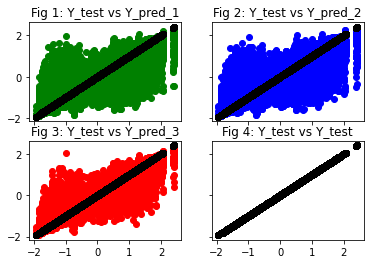

In [57]:
# Crea gráficos y subgráficos
figure_knn = plt.figure(figsize=(200,200))
figure_knn, axes = plt.subplots(nrows=2,ncols=2, sharex=True, sharey=True)

# Añade los puntos de cada predicción
axes[0][0].scatter(y_test,y_pred_1,color = "g")
axes[0][1].scatter(y_test,y_pred_2,color = "b")
axes[1][0].scatter(y_test,y_pred_3,color = "r")
axes[1][1].scatter(y_test,y_test,color = "k")

# Añade la línea base de comparación vs caso ideal
axes[0][0].scatter(y_test,y_test,color = "k")
axes[0][1].scatter(y_test,y_test,color = "k")
axes[1][0].scatter(y_test,y_test,color = "k")

# Añade título a cada subgráfico.
axes[0][0].title.set_text("Fig 1: Y_test vs Y_pred_1")
axes[0][1].title.set_text("Fig 2: Y_test vs Y_pred_2")
axes[1][0].title.set_text("Fig 3: Y_test vs Y_pred_3")
axes[1][1].title.set_text("Fig 4: Y_test vs Y_test")


plt.show()

In [58]:
# Recordatorio los modelos que representan cada gráfico:
# KNN-1: weights="distance", algorithm="kd_tree", metric="euclidean"(valor por defecto)--> y_pred_1
# KNN-2: weights="uniform", algorithm="kd_tree, metric="euclidean"(valor por defecto) --> y_pred_2
# KNN-3: weights="distance", algorithm="kd_tree", metric="manhattan" --> y_pred_3

# De los gráficos se observa que los modelos KNN-1 y KNN-2 tienen un comportamiento similar, lo que parece indicar que lo que
# más influyó a la hora de obtener resultados diferentes fue cambiar la métrica de distancia utilizada.
# Se considera además que los resultados de KNN-3 son los mejores ya que se ven menos dispersos, lo cual corrobora de alguna manera
# la conclusión obtenida a través de los valores de R^2, ya que KNN-3 tiene el mayor valor (0.96 vs 0.87 y 0.85 para los modelos KNN-1 y KNN-2, respectivamente)

In [59]:
## MEJOR MODELO KNN PROBADO: KNN-3 - weights="distance", algorithm="kd_tree", metric="manhattan",k = 5 

# Se trabajará en las 3 pruebas con el modelo Random Forest y luego se harán predicciones con el mejor KNN y mejor RF
# Nota: Como nomenclatura se asignarán los valores 4,5 y 6 a cada prueba de RF para mantener el orden con los vectores de resultados

<h1>Algoritmo Random Forest</h1>

<h2>RF-4</h2>

In [60]:
# Para mantener consistencia con los resultados obtenidos en KNN aquí tambien se utilizará un algoritmo de regresión.
# Al igual que en el caso anterior el desempeño será evaluado de acuerdo al valor de R^2, el cual es entregado por el método .score()
# Mientras más cercano a 1, mejor será la correlación.
RF_4 = RandomForestRegressor(n_estimators=10, criterion="mse", max_depth=5, max_features="log2")
RF_4.fit(x_train,y_train)

RandomForestRegressor(max_depth=5, max_features='log2', n_estimators=10)

In [61]:
y_pred_4 = RF_4.predict(x_test)
y_pred_4

array([ 0.10692573, -0.85326527, -0.00397329, ..., -0.09555024,
        0.14063055, -0.71917613])

In [62]:
R_score_4 = RF_4.score(x_test,y_test)
R_score_4

0.3790959661385047

<h2>RF-5</h2>

In [63]:
RF_5 = RandomForestRegressor(n_estimators=100, criterion="mse", max_depth=10, max_features="log2")
RF_5.fit(x_train,y_train)

RandomForestRegressor(max_depth=10, max_features='log2')

In [64]:
y_pred_5 = RF_5.predict(x_test)
y_pred_5

array([ 0.44765624, -1.26440838,  0.02346445, ..., -0.07680009,
        0.30113223, -1.14326235])

In [65]:
R_score_5 = RF_5.score(x_test,y_test)
R_score_5

0.8561474735914388

<h2>RF-6</h2>

In [66]:
RF_6 = RandomForestRegressor(n_estimators=100, criterion="mse", max_depth=None, max_features="log2")
RF_6.fit(x_train,y_train)

RandomForestRegressor(max_features='log2')

In [67]:
y_pred_6 = RF_6.predict(x_test)
y_pred_6

array([ 0.60406766, -1.32826159,  0.08499953, ..., -0.15490591,
       -0.03072213, -1.4067761 ])

In [68]:
R_score_6 = RF_6.score(x_test,y_test)
R_score_6

0.9999936931641299

In [69]:
# Aquí se quizo visualizar el impacto del número de árboles (n_estimators) y la profundidad de estos. Se observa un gran cambio 
# en el R^2 desde (0.38 a 0.85) cuando desde el caso inicial se aumenta el número de árboles desde 10 a 100 y la profundidad(max_depth) de 5 a 10.
# El cambio al aumentar la profundidad de los árboles desde 10 a None (árboles completos) es más moderado, pero de todas maneras importante.
# Se obtiene una correlación muy cercana a 1.

<h2>Visualización Árboles</h2>

In [70]:
# Nota general para los 3 árboles: Se presentan árboles con una profundidad igual 2 (max_depth=2) lo cual seguramente es muy sobresimplificado, 
# pero se decidió hacer así por motivos de presentación y para disminuir el tiempo de ejecución del programa.
# Si se quiere ver árboles más grandes basta con cambiar el parámetro max_depth al entero deseado o se puede dejar como None
# para que se generen los árboles completos. 

In [71]:
# fn: features names, corresponde a las columnas que quieren ser visualizadas.
fn = list(df_final_normalizado.columns)
fn.remove("Fuel_Price")
# cn: class names, corresponde a las columnas objetivos (la que se quiere predecir).
cn = ["Fuel_Price"]


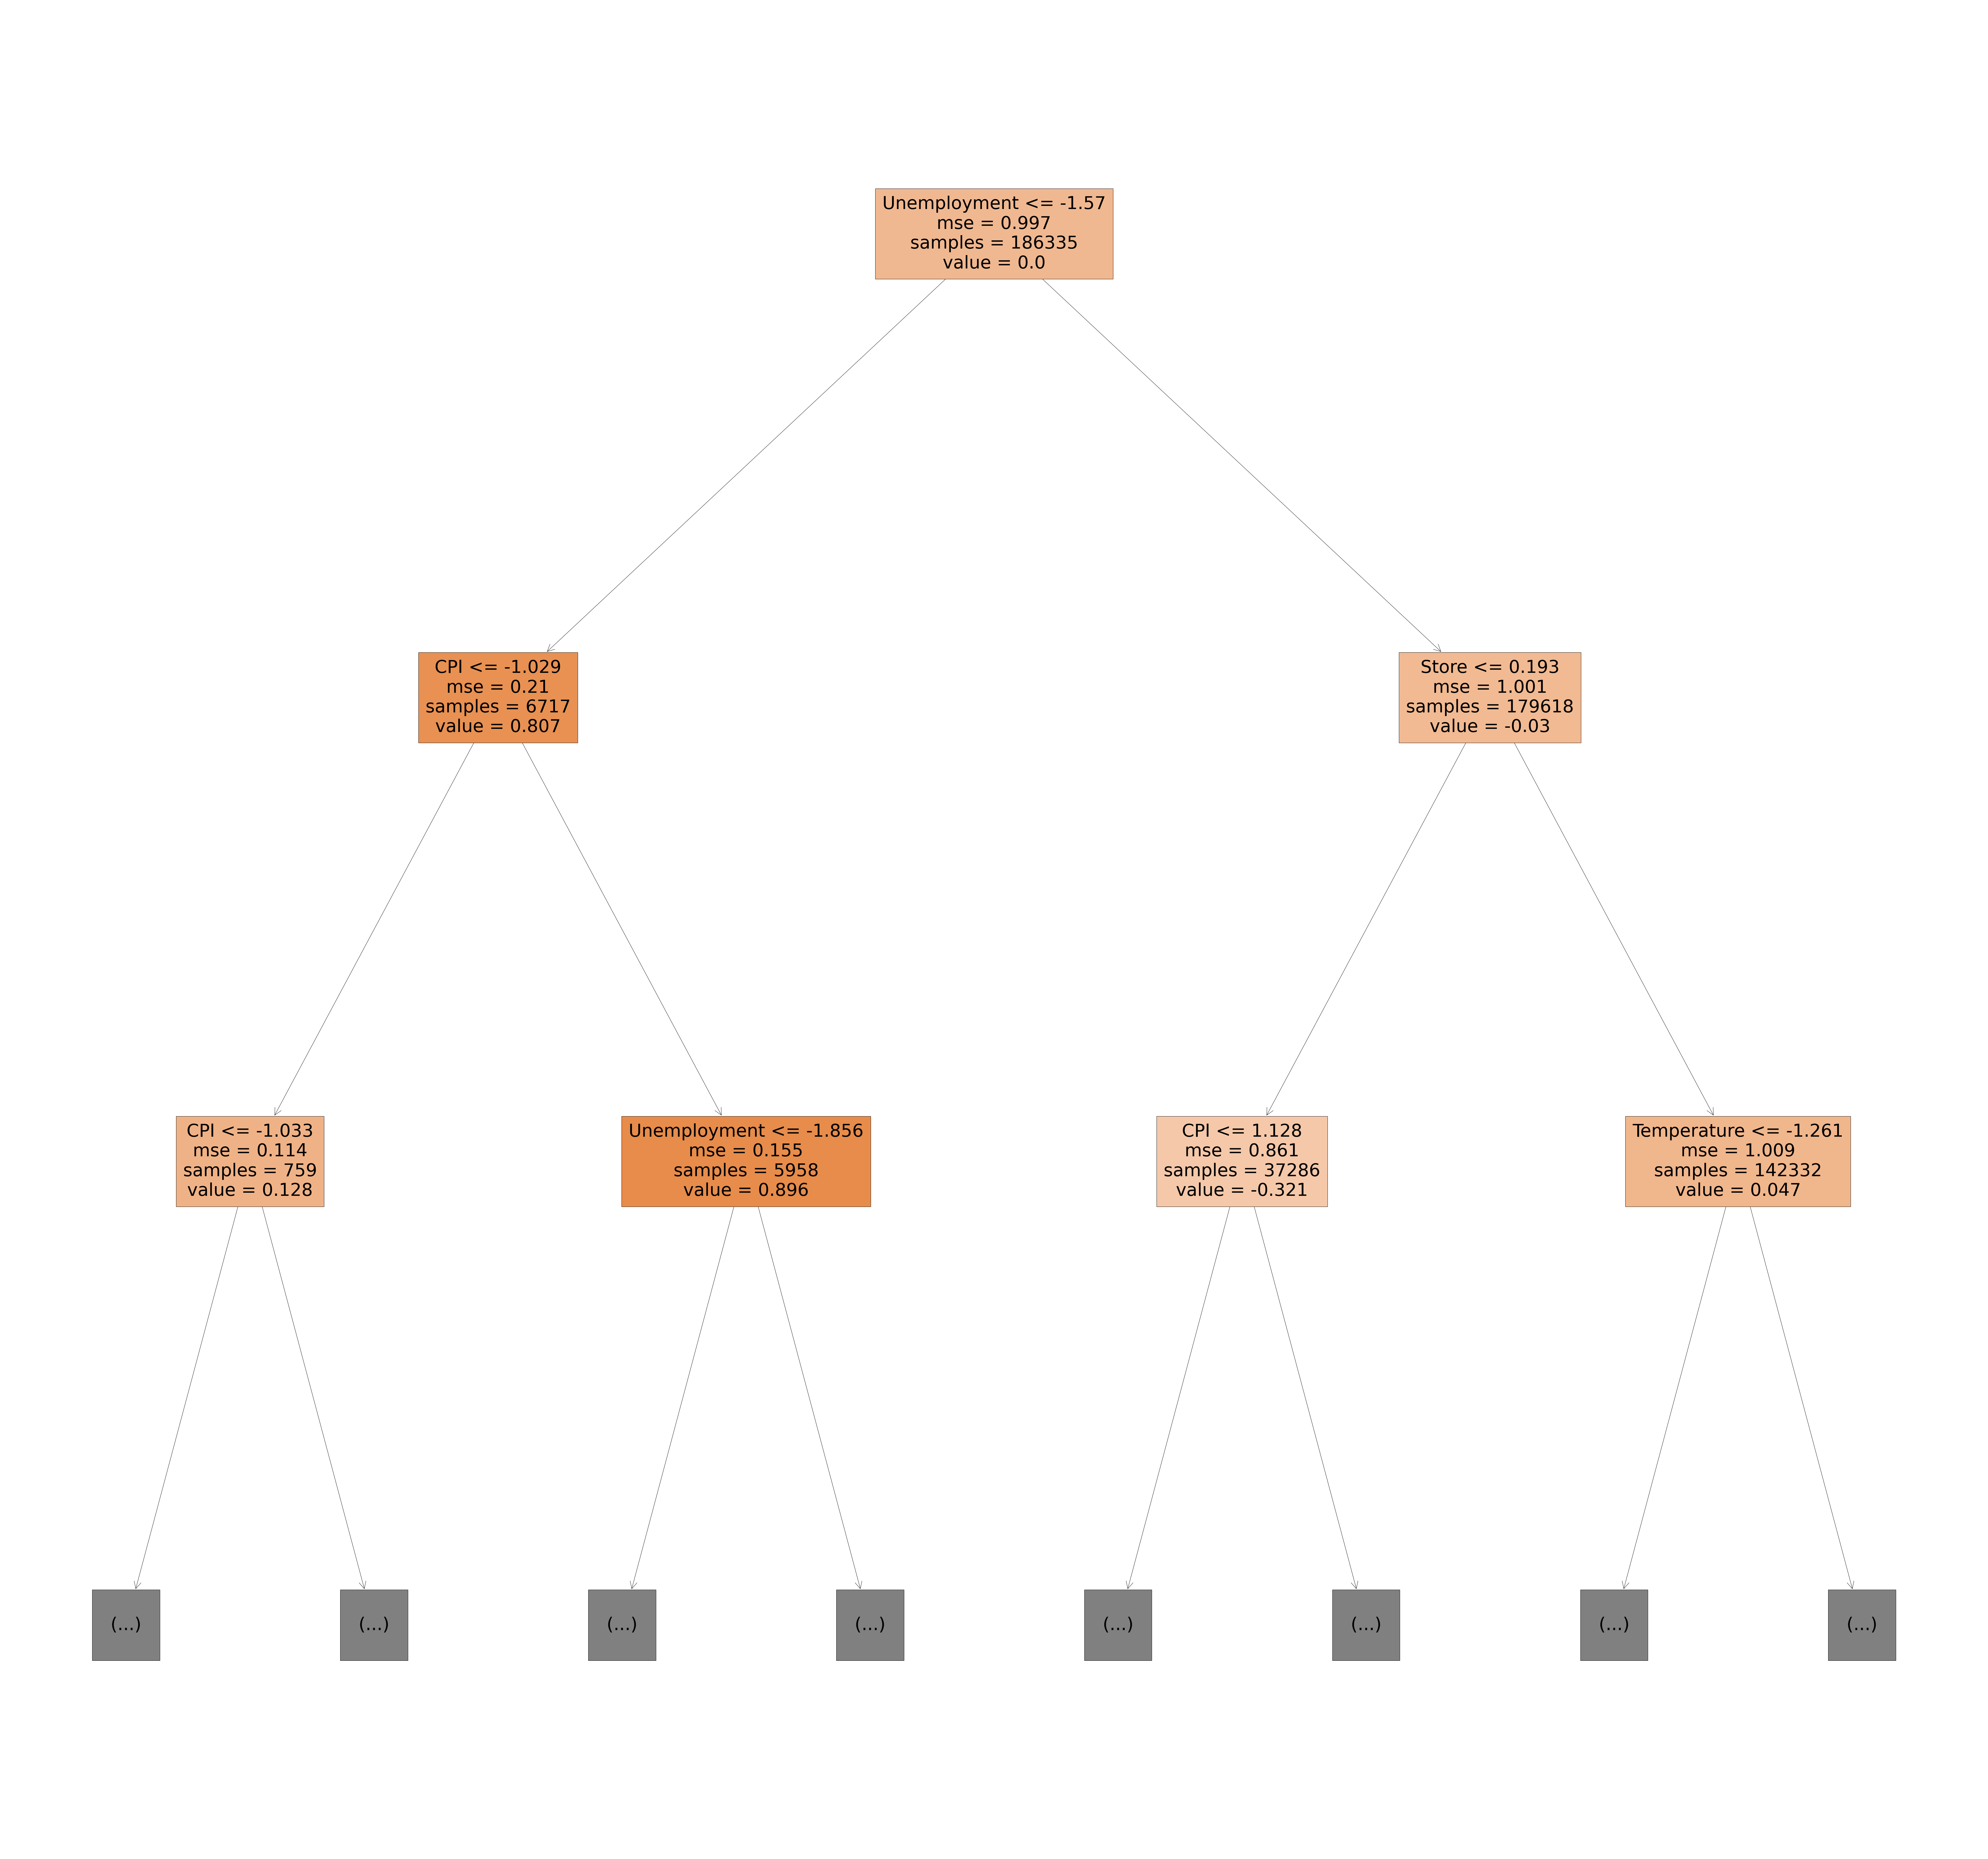

In [72]:
# Árbol RF-4
fig = plt.figure(figsize=(125,120))
rf_4_tree = tree.plot_tree(RF_4.estimators_[0],
              feature_names=fn,
              class_names=cn,
              filled=True, max_depth=2)
fig.savefig("tree_4.png")

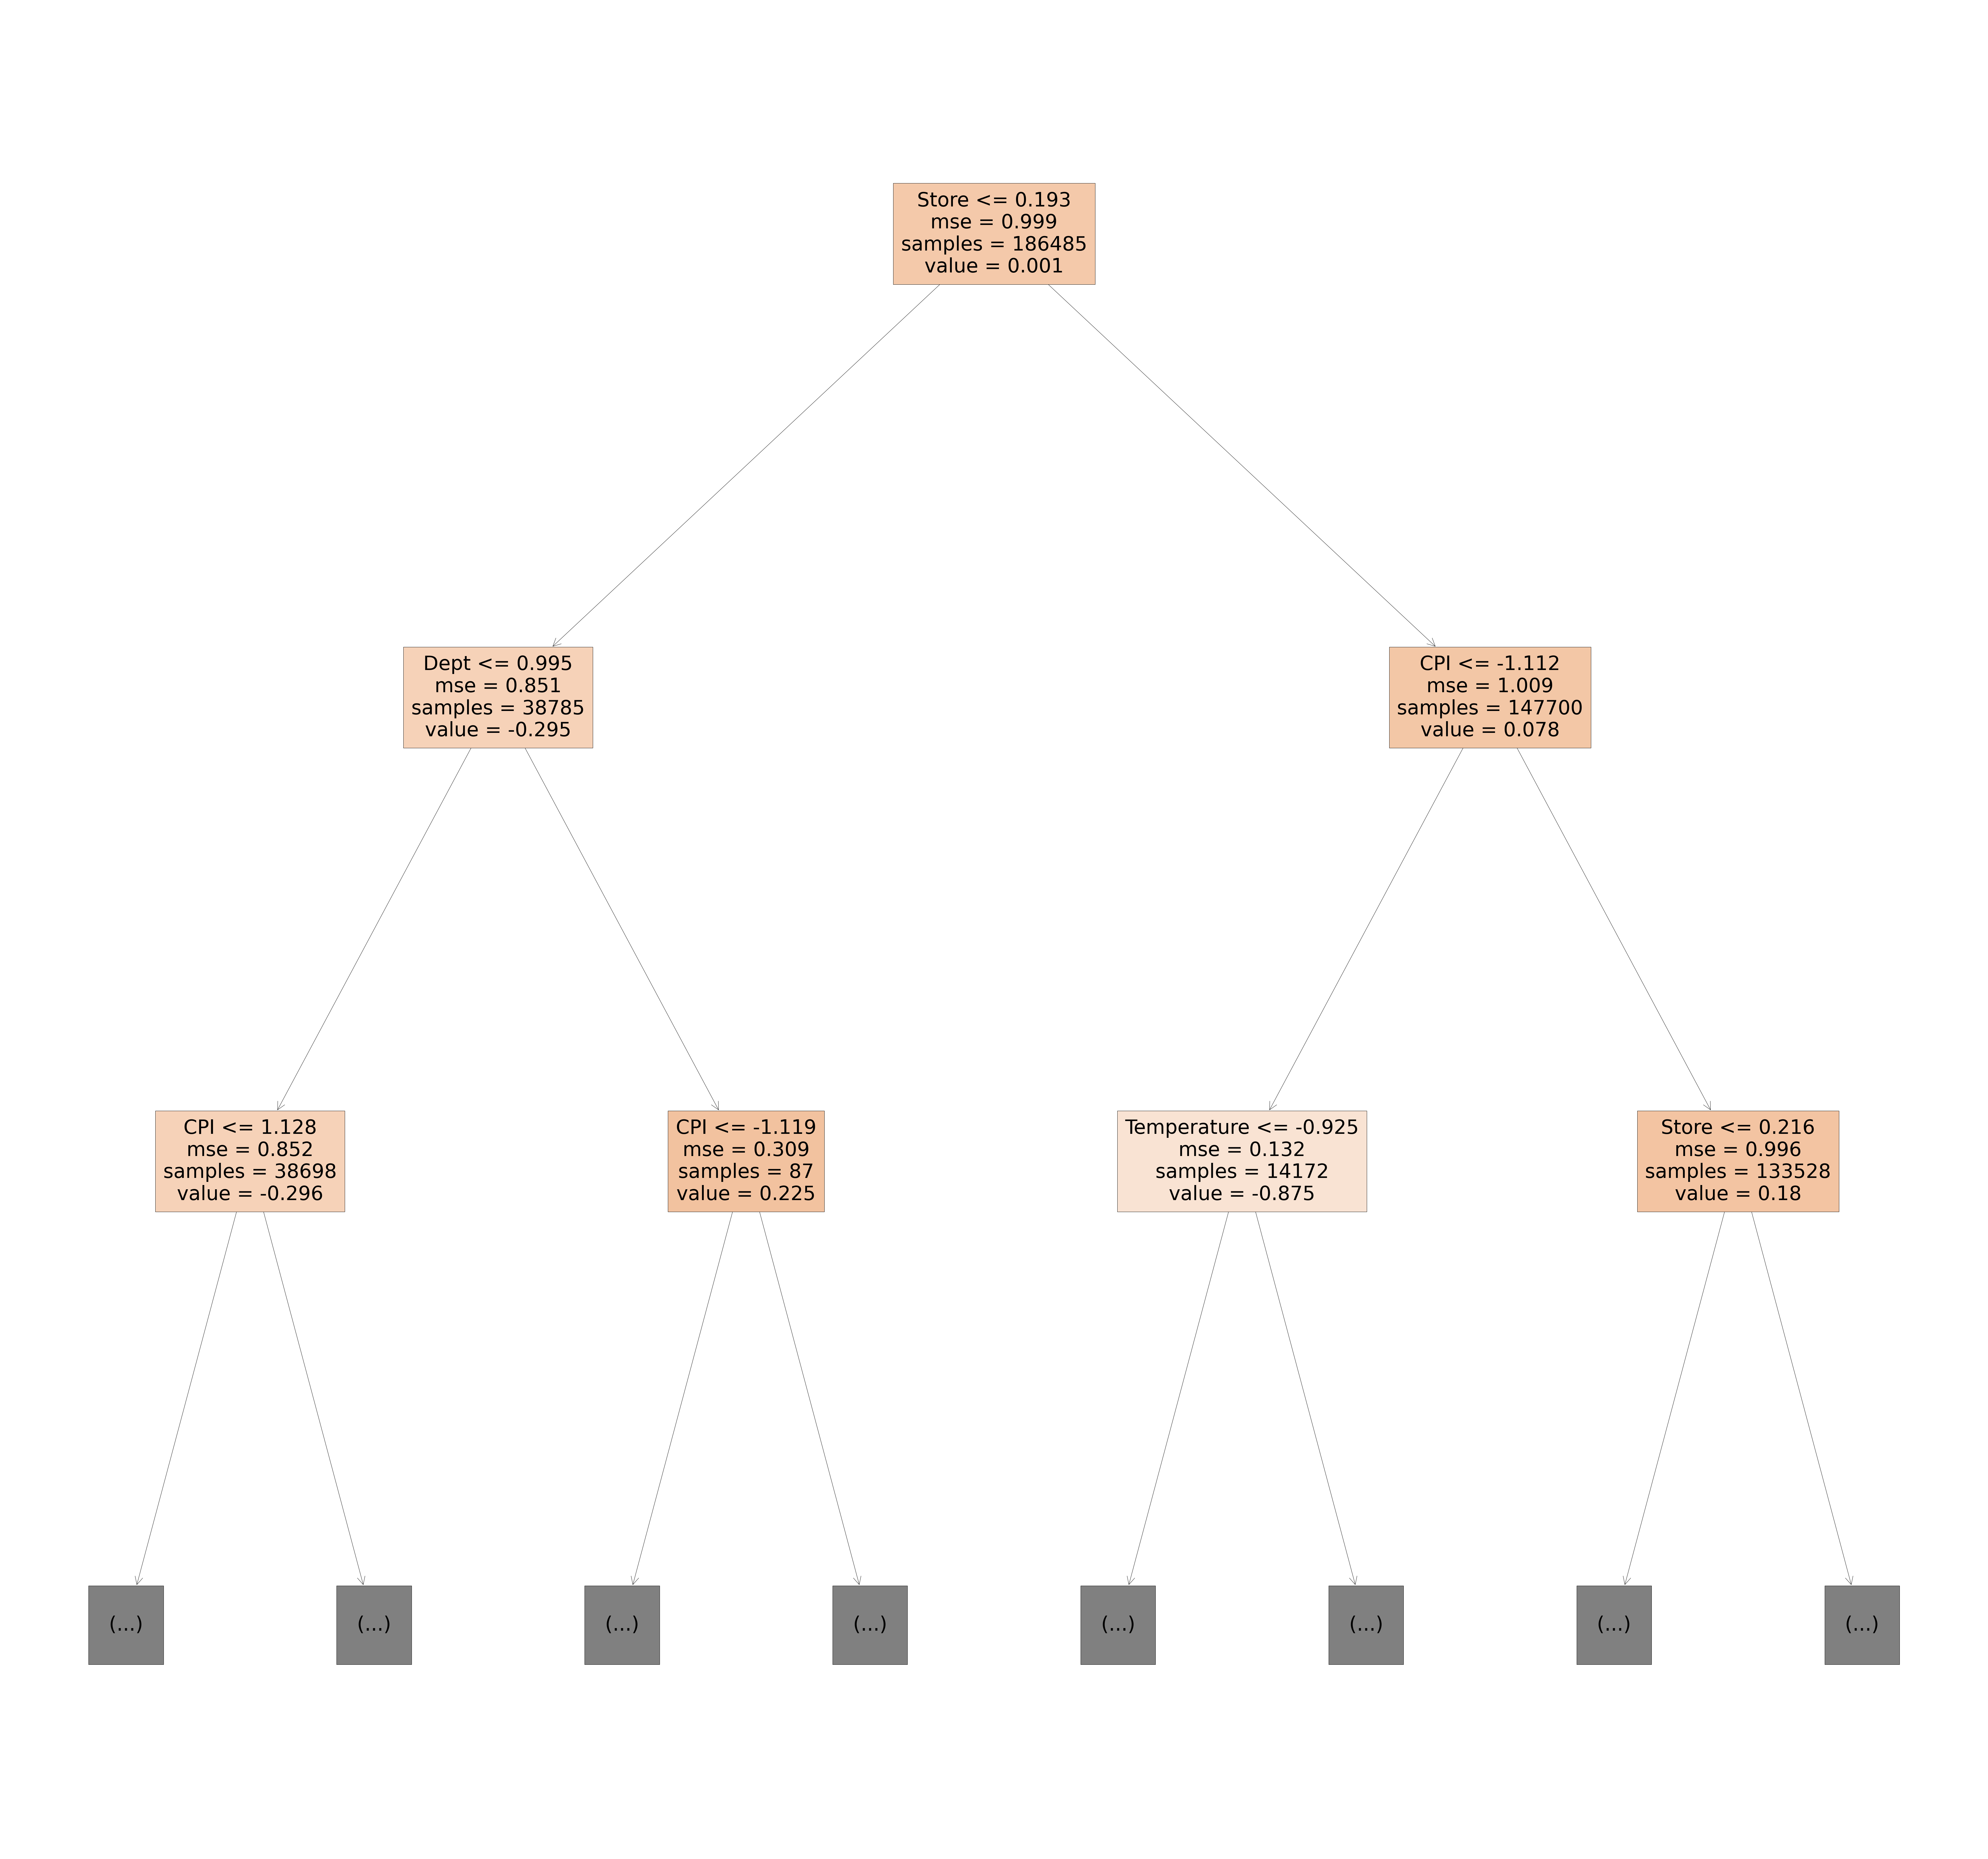

In [73]:
# Árbol RF-5
fig = plt.figure(figsize=(125,120))
rf_5_tree = tree.plot_tree(RF_5.estimators_[0],
              feature_names=fn,
              class_names=cn,
              filled=True, max_depth=2)
fig.savefig("tree_5.png")

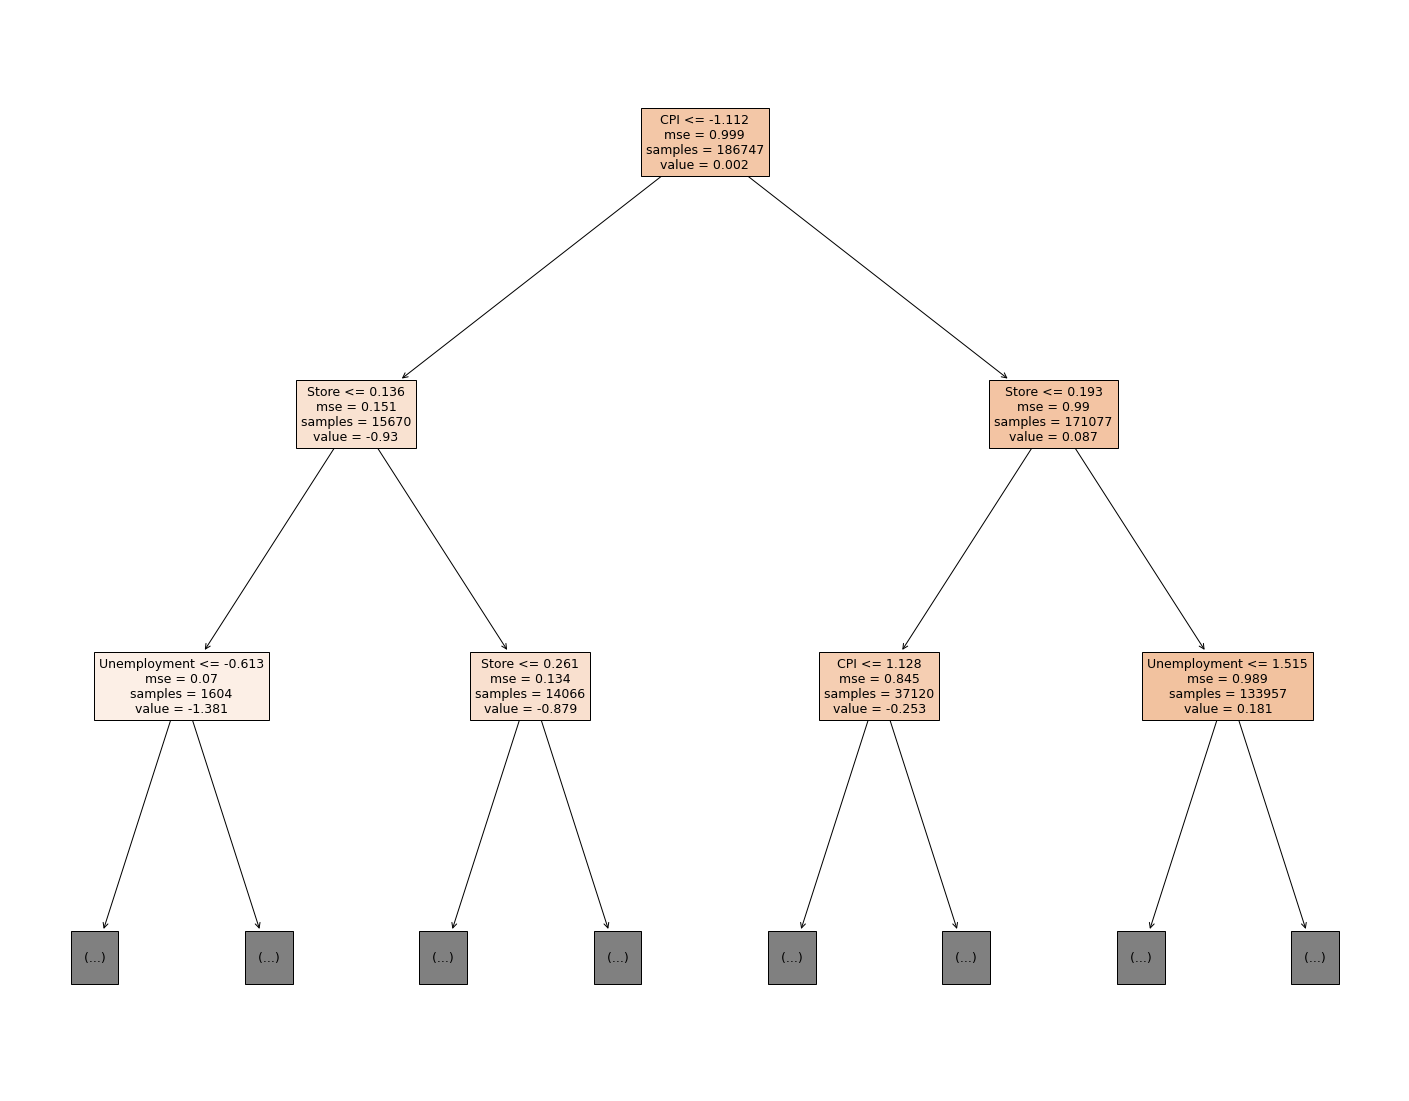

In [74]:
# Árbol RF-6
fig = plt.figure(figsize=(25,20))
rf_6_tree = tree.plot_tree(RF_6.estimators_[0],
              feature_names=fn,
              class_names=cn,
              filled=True, max_depth=2)
fig.savefig("tree_6.png")

<h2>Importancias</h2>

<h3>Importancias RF-4</h3>

In [75]:
# Se almacenan las importancias y los nombres de los atributos en listas para posteriormente crear un dataframe y graficar.
# Nota: La variable "fn" fue utilizada más arriba para almacenar una lista con los nombres de los atributos que se requieren.  
nombres_4 = []
importancias_4 = []
for nombre, importancia in zip(fn, RF_4.feature_importances_):
    print(nombre, "=", importancia)
    nombres_4.append(nombre)
    importancias_4.append(importancia)

Store = 0.11984292228152434
Dept = 3.9637911043083596e-07
Date = 0.06282568918719085
Weekly_Sales = 3.534682149167267e-19
IsHoliday = 0.009572270931826842
Temperature = 0.07784199371750379
CPI = 0.498306559582235
Unemployment = 0.2316101679206088


In [76]:
# Se crea el dataframe con los nombres e importancias 
df_feat_4 = pd.DataFrame(nombres_4,columns=["Nombre"])
df_feat_4["Importancia"] = importancias_4
df_feat_4 = df_feat_4.sort_values(by=["Importancia"])
df_feat_4

,Nombre,Importancia
3,Weekly_Sales,3.534682e-19
1,Dept,3.963791e-07
4,IsHoliday,9.572271e-03
2,Date,6.282569e-02
5,Temperature,7.784199e-02
0,Store,1.198429e-01
7,Unemployment,2.316102e-01
6,CPI,4.983066e-01


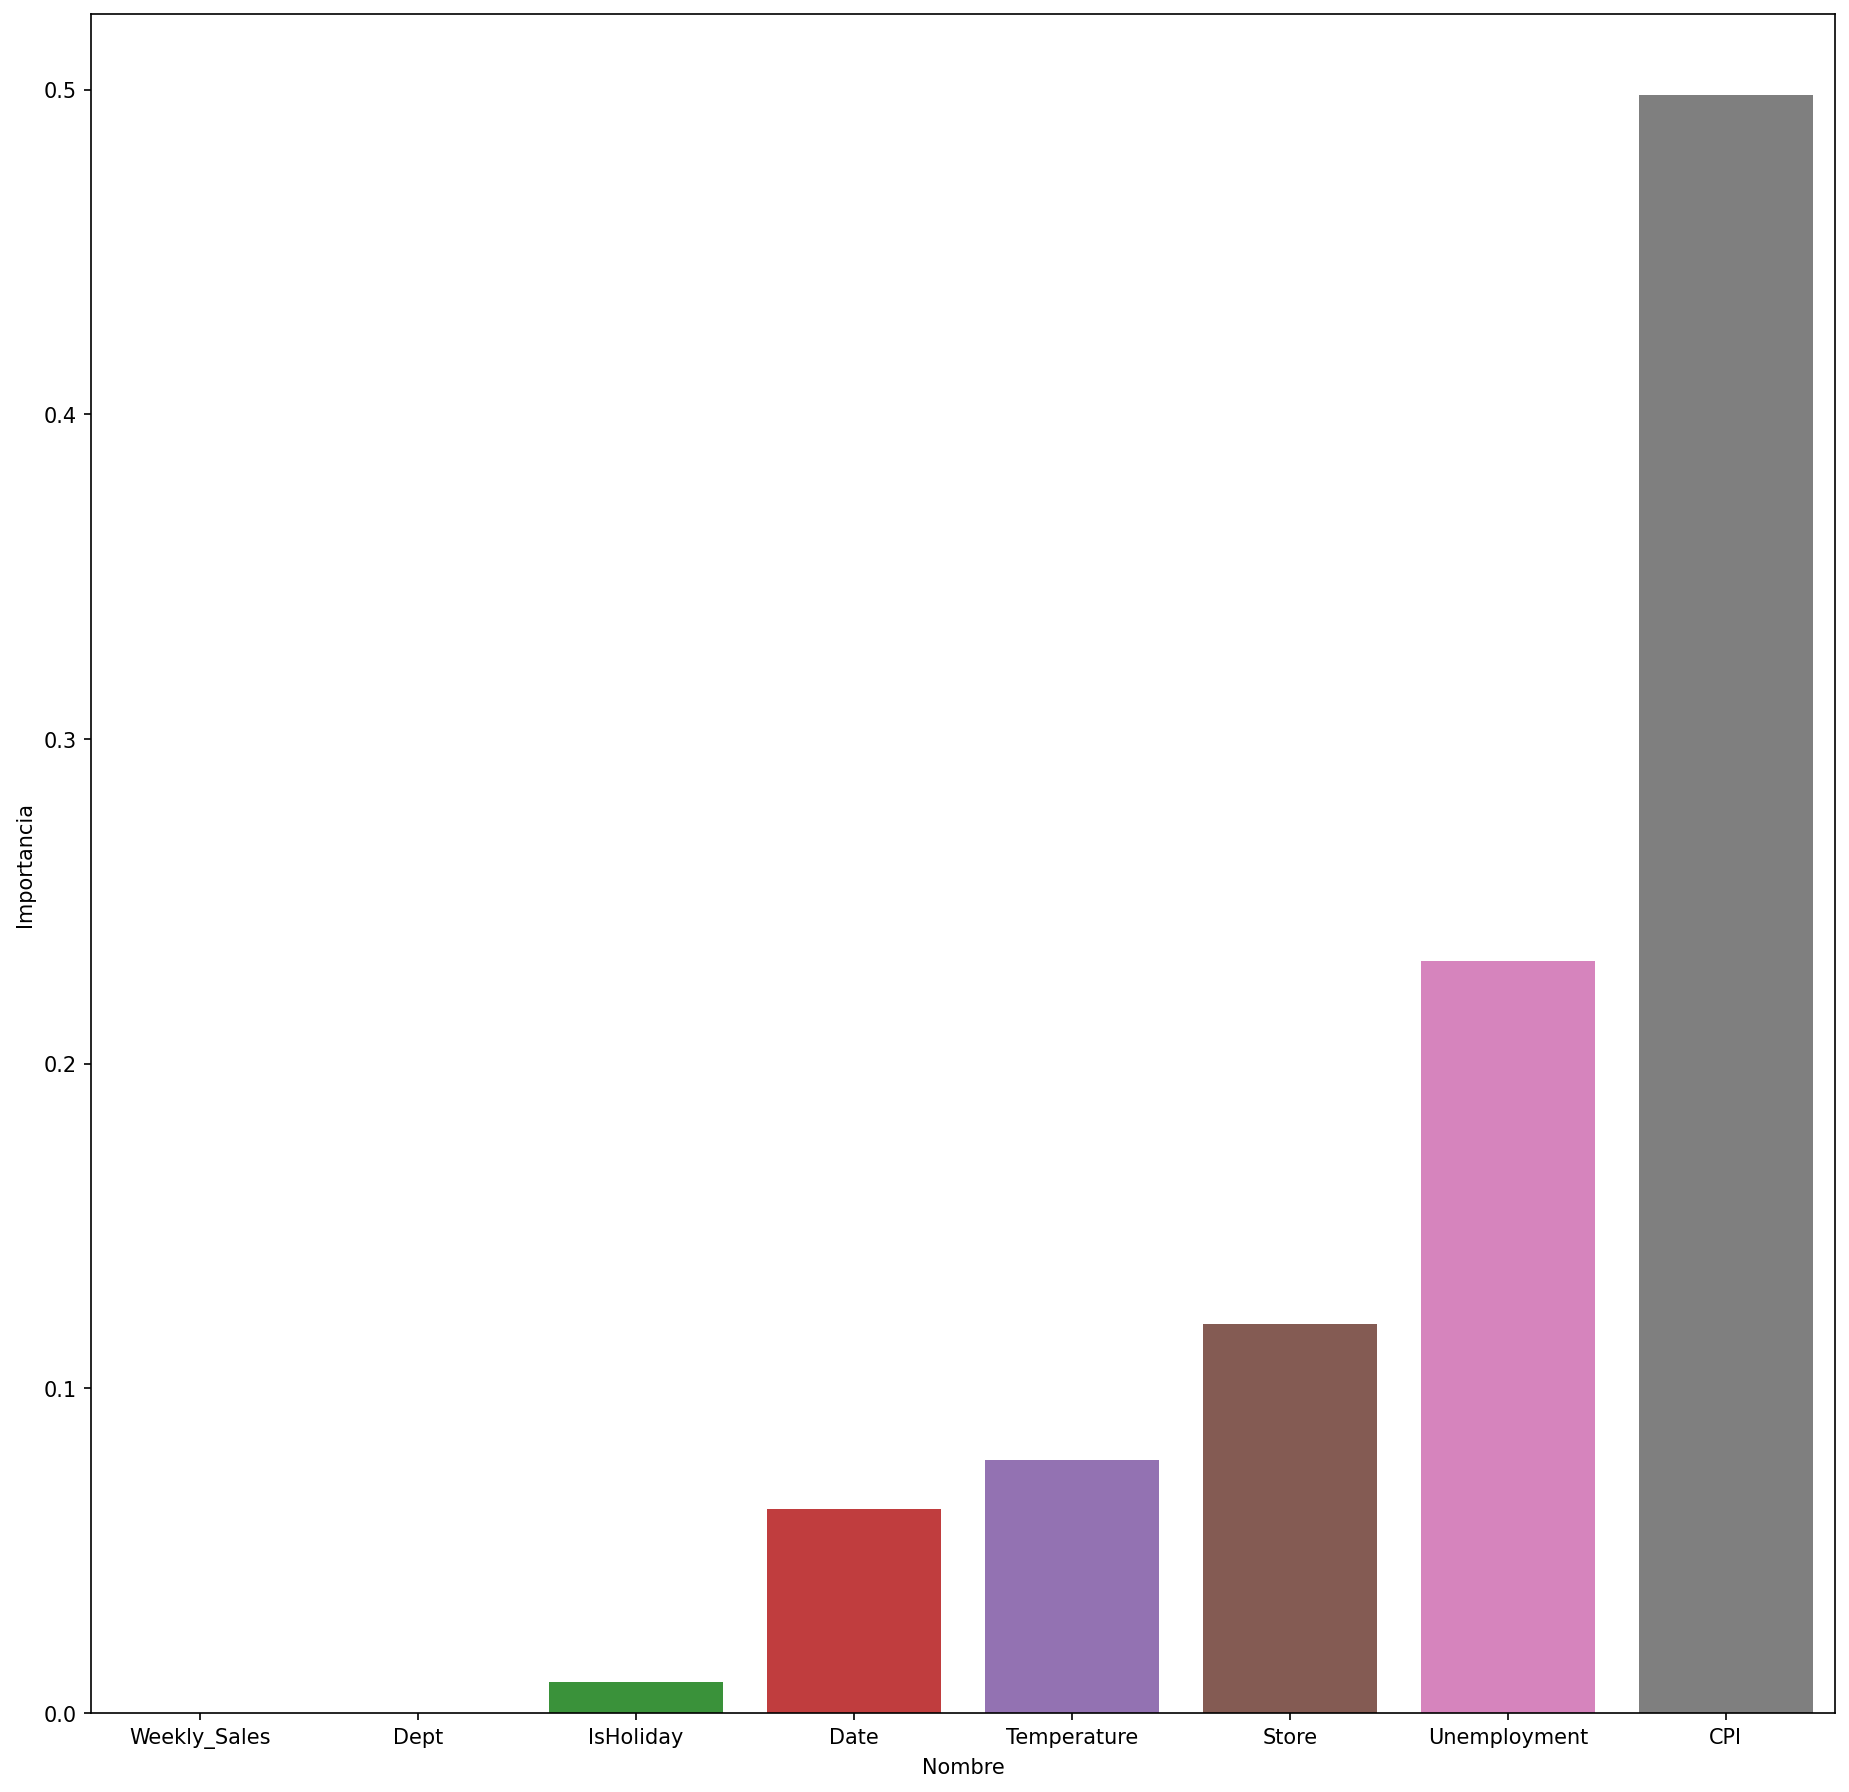

In [77]:
# Se grafica usando la librería seaborn
fig = plt.figure(figsize=(15,15), dpi=150)
fig_feat_4 = sns.barplot(x="Nombre", y="Importancia", data=df_feat_4)


<h3>Importancias RF-5</h3>

In [78]:
nombres_5 = []
importancias_5 = []
for nombre, importancia in zip(fn, RF_5.feature_importances_):
    print(nombre, "=", importancia)
    nombres_5.append(nombre)
    importancias_5.append(importancia)

Store = 0.095604592560017
Dept = 4.1241754404701056e-05
Date = 0.0261887371303389
Weekly_Sales = 0.0005449536582681322
IsHoliday = 0.0019215932296140375
Temperature = 0.08594761238057816
CPI = 0.5597101960799588
Unemployment = 0.2300410732068205


In [79]:
# Se crea el dataframe con los nombres e importancias 
df_feat_5 = pd.DataFrame(nombres_5,columns=["Nombre"])
df_feat_5["Importancia"] = importancias_5
df_feat_5 = df_feat_5.sort_values(by=["Importancia"])
df_feat_5

,Nombre,Importancia
1,Dept,0.000041
3,Weekly_Sales,0.000545
4,IsHoliday,0.001922
2,Date,0.026189
5,Temperature,0.085948
0,Store,0.095605
7,Unemployment,0.230041
6,CPI,0.559710


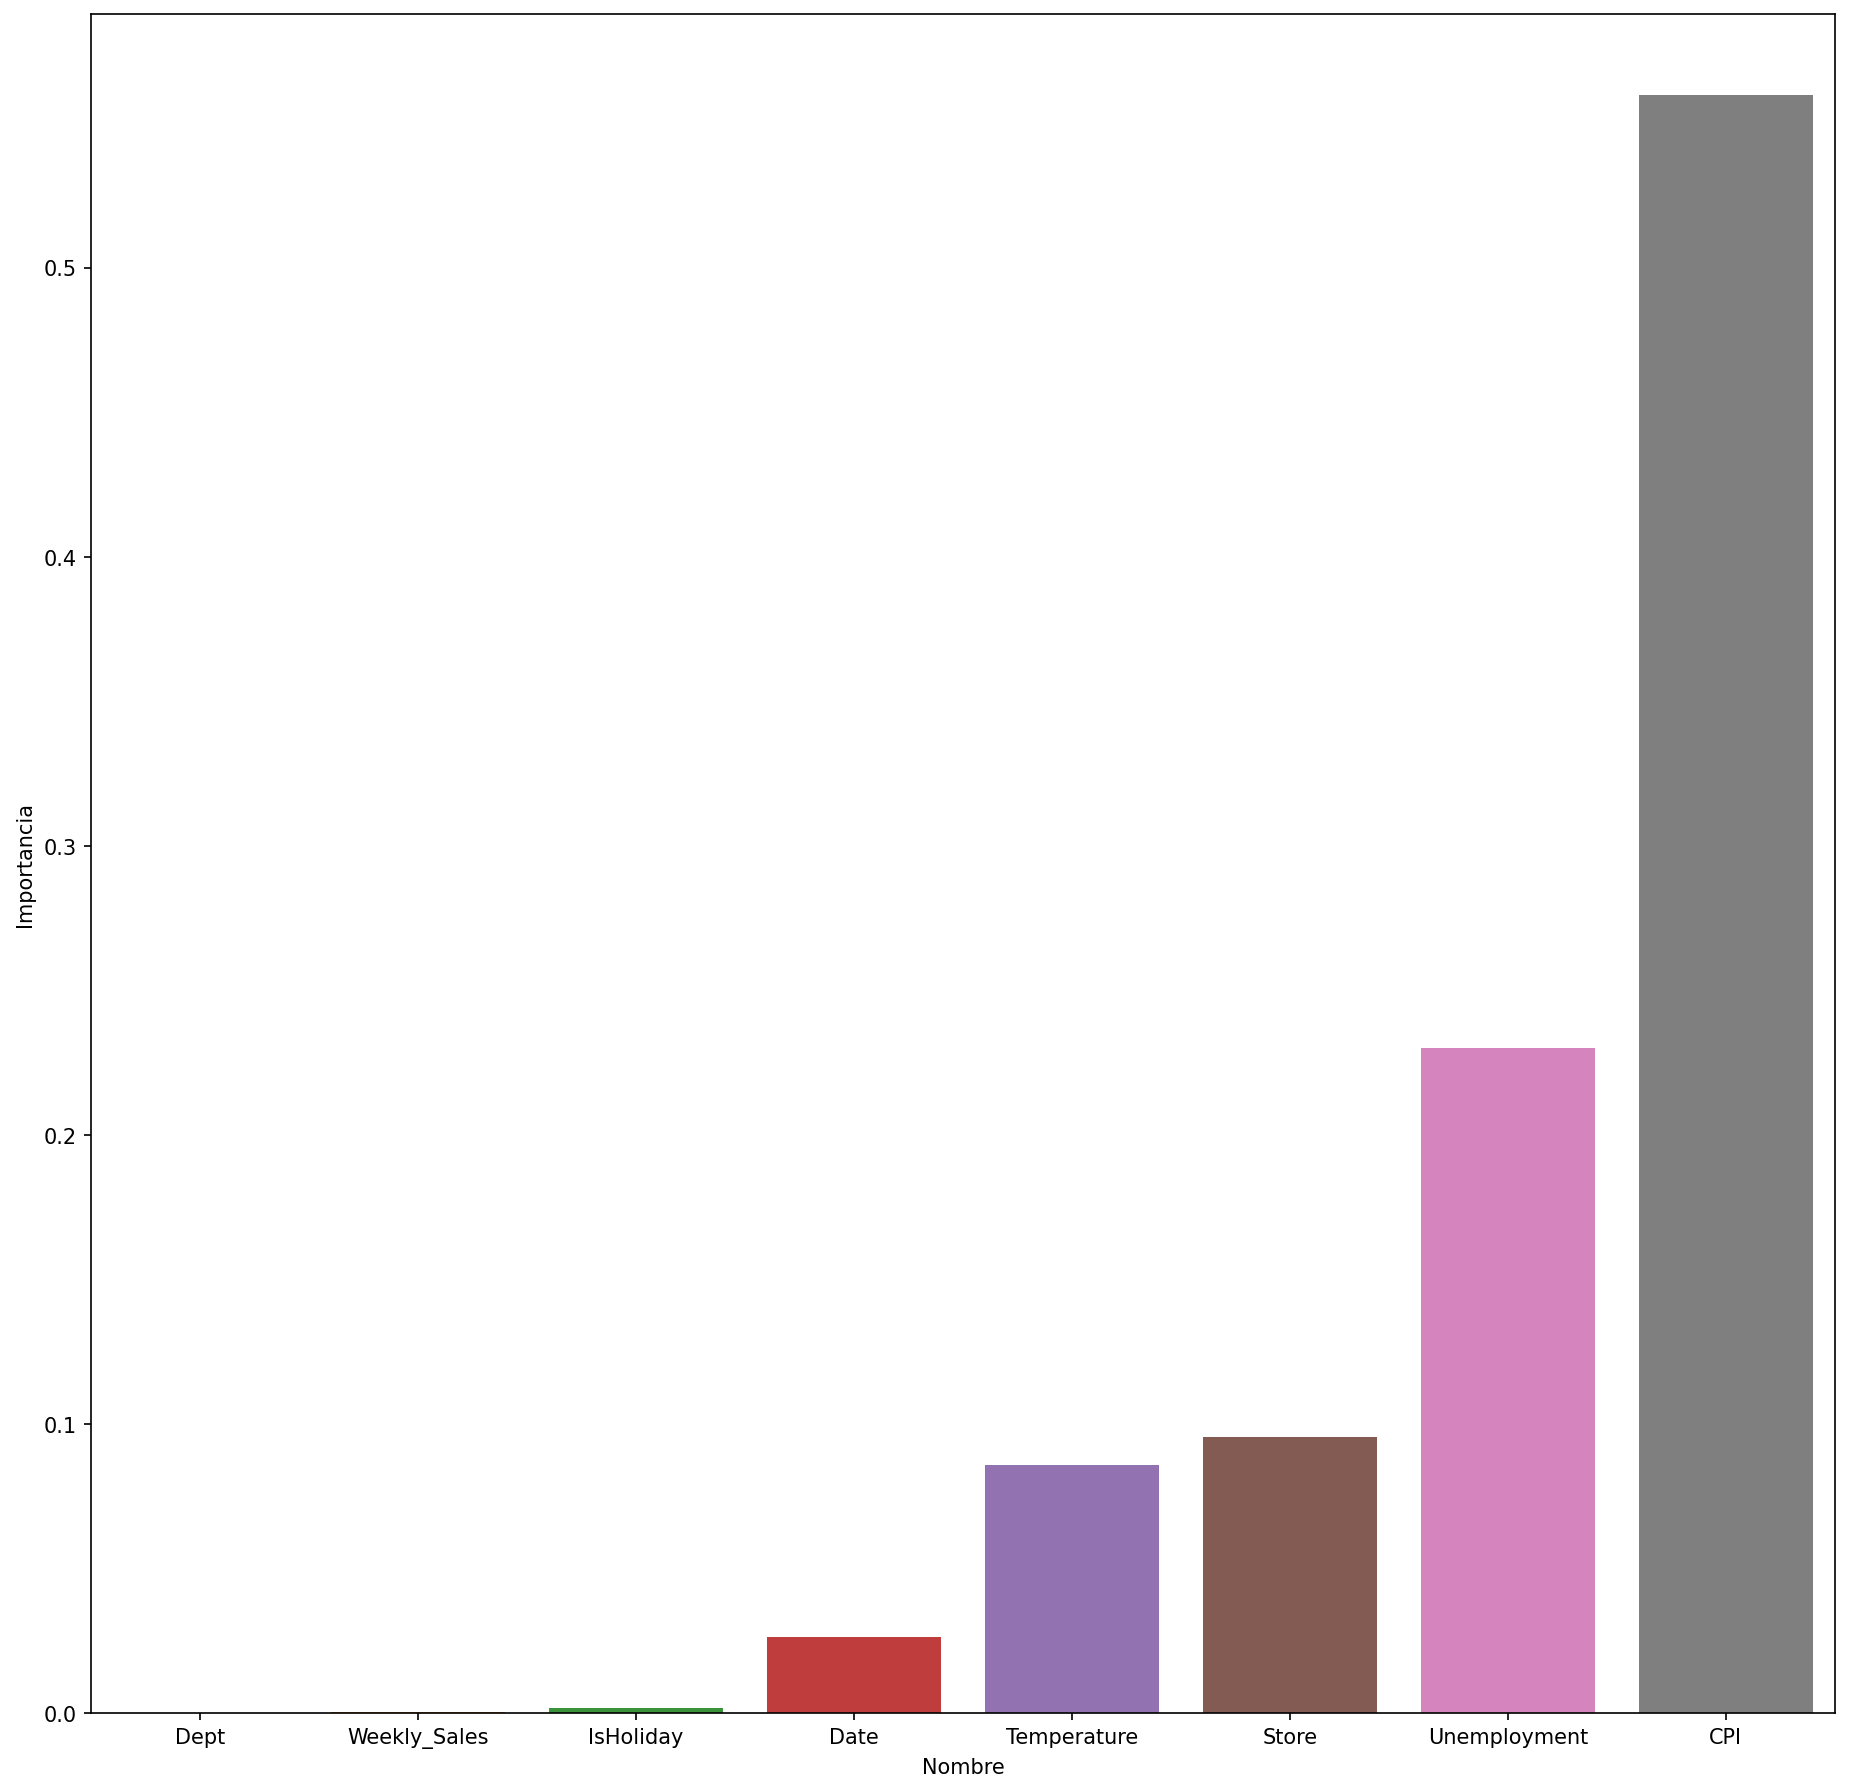

In [80]:
fig = plt.figure(figsize=(15,15), dpi=150)
fig_feat_5 = sns.barplot(x="Nombre", y="Importancia", data=df_feat_5)

<h3>Importancias RF-6</h3>

In [81]:
nombres_6 = []
importancias_6 = []
for nombre, importancia in zip(fn, RF_6.feature_importances_):
    print(nombre, "=", importancia)
    nombres_6.append(nombre)
    importancias_6.append(importancia)

Store = 0.1041897121716477
Dept = 0.00012078496657237983
Date = 0.036795599190930624
Weekly_Sales = 0.0008219145583951594
IsHoliday = 0.0022983626344947584
Temperature = 0.09160482428481026
CPI = 0.5305385050412612
Unemployment = 0.23363029715188793


In [82]:
# Se crea el dataframe con los nombres e importancias 
df_feat_6 = pd.DataFrame(nombres_6,columns=["Nombre"])
df_feat_6["Importancia"] = importancias_6
df_feat_6 = df_feat_6.sort_values(by=["Importancia"])
df_feat_6

,Nombre,Importancia
1,Dept,0.000121
3,Weekly_Sales,0.000822
4,IsHoliday,0.002298
2,Date,0.036796
5,Temperature,0.091605
0,Store,0.104190
7,Unemployment,0.233630
6,CPI,0.530539


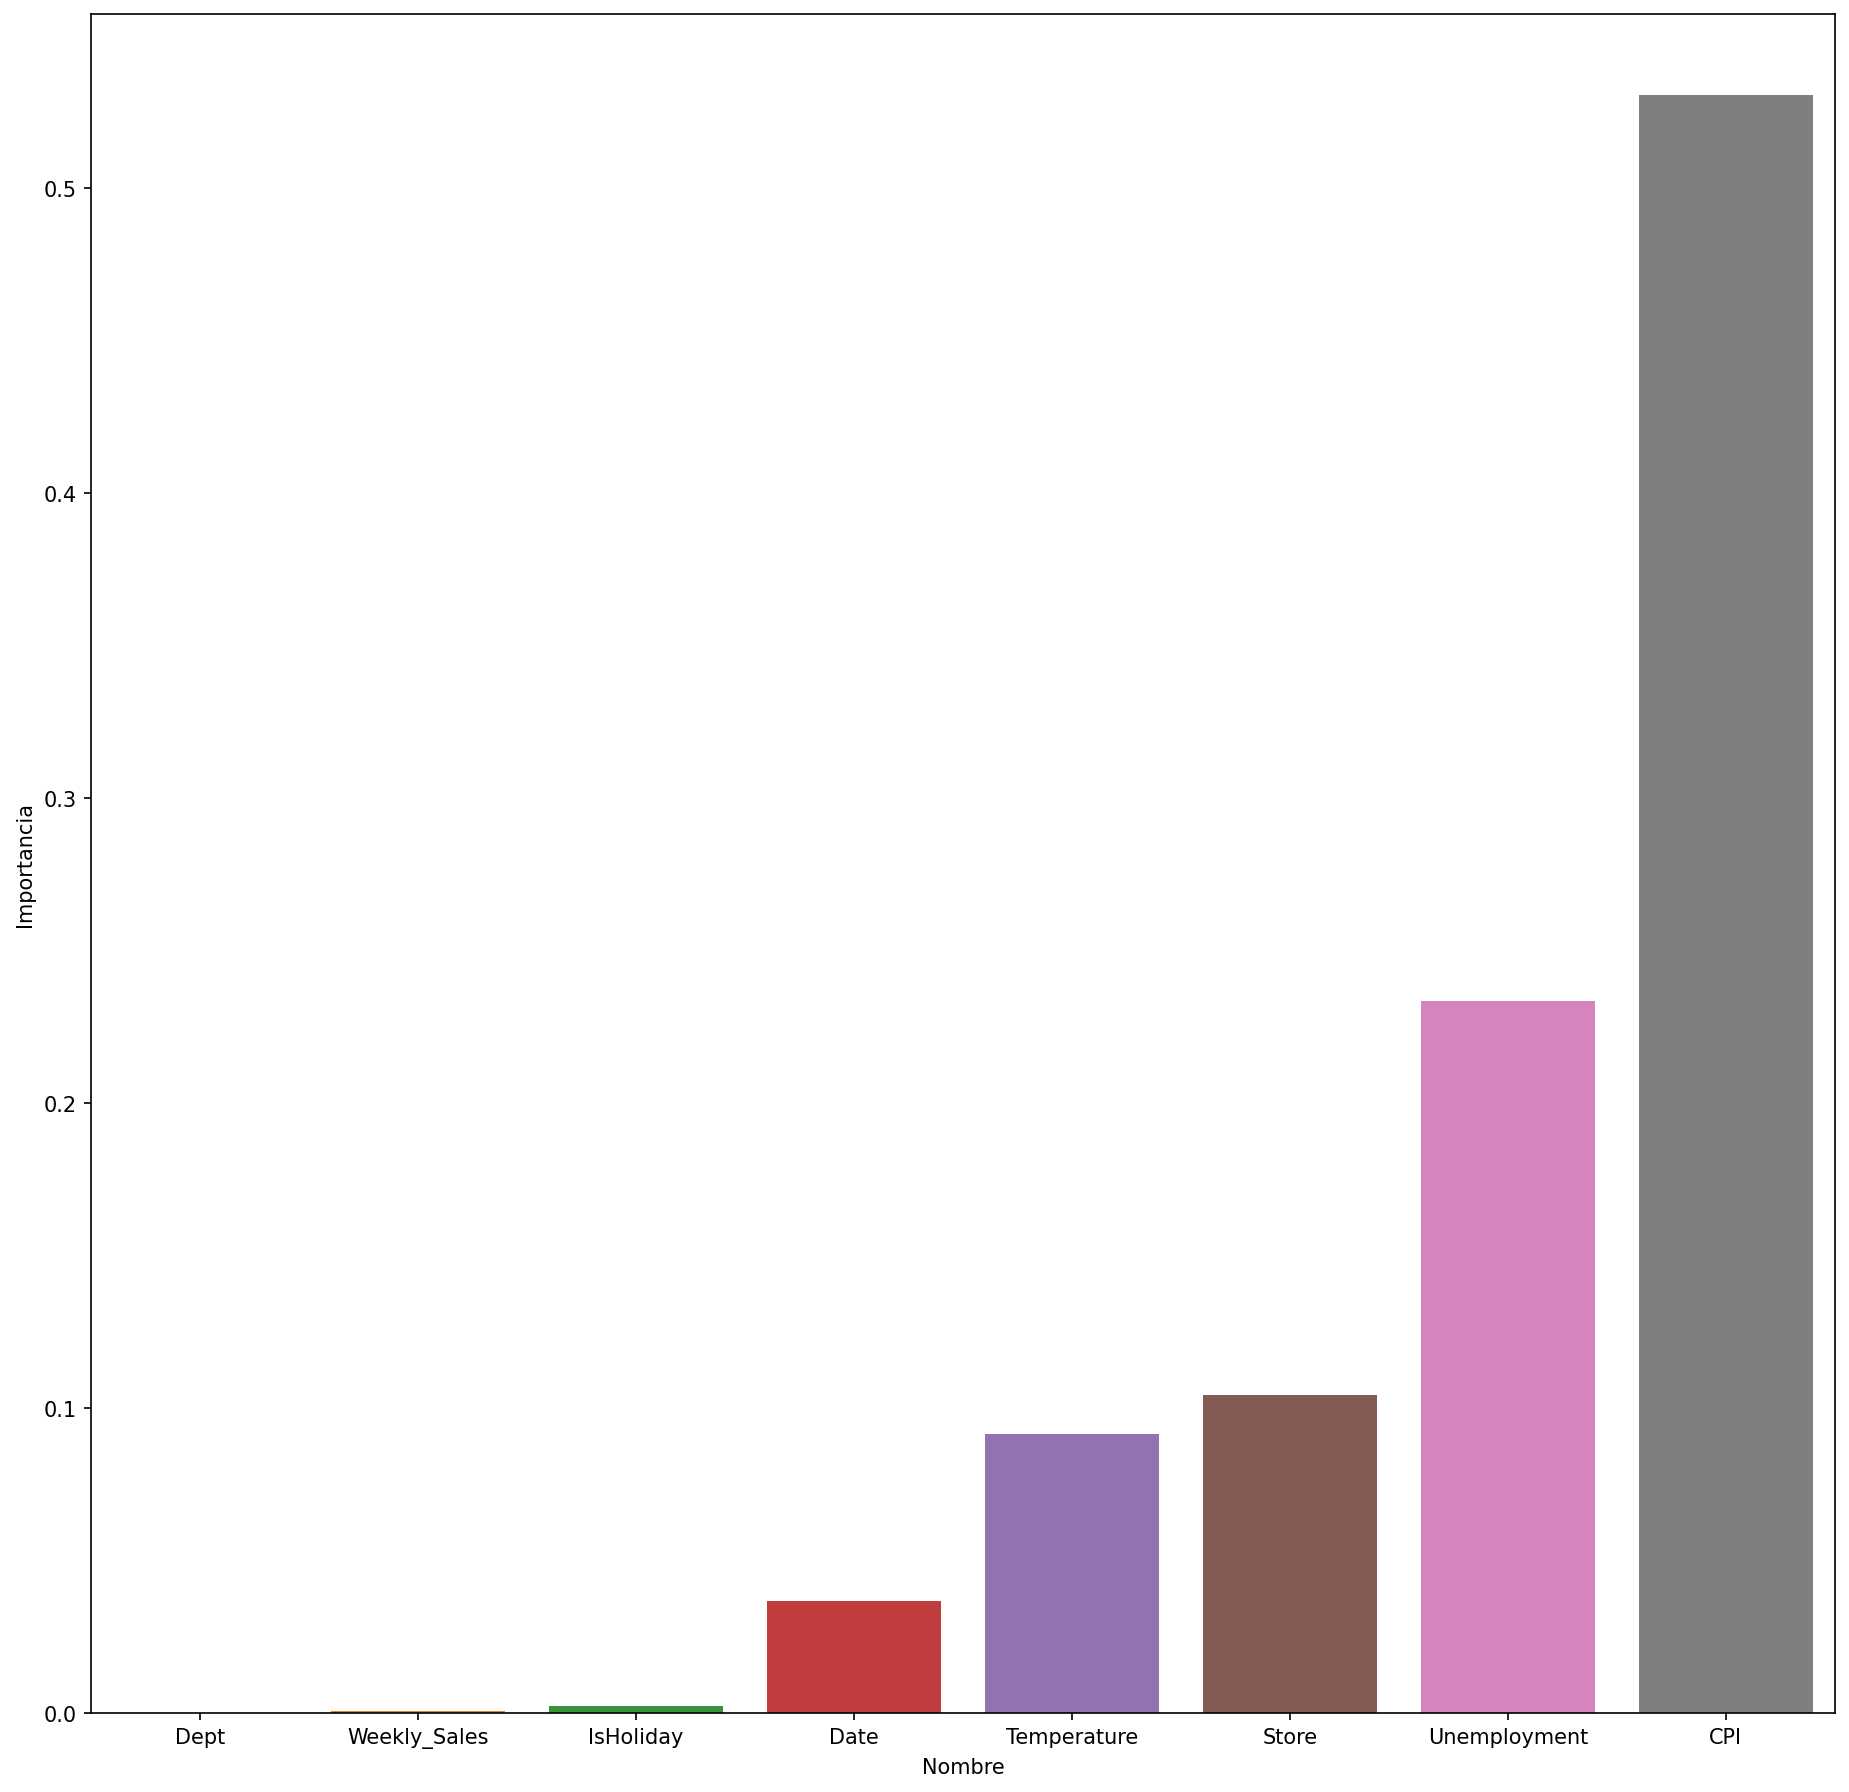

In [83]:
fig = plt.figure(figsize=(15,15), dpi=150)
fig_feat_6 = sns.barplot(x="Nombre", y="Importancia", data=df_feat_6)

<h3>Observaciones respecto a los gráficos</h3>

<p>Se observa en general que el orden de las importancias es similar en los 3 casos y las más impactantes son CPI (índice de precio al consumidor) y la tasa de desempleo, lo cual tiene sentido, debido a que éstos son indicadores globales de economía que deben tener un mayor impacto en el precio del combustible que los indicadores de ventas de algunas tiendas específicas, la fecha o la temperatura. </p>

<h1>Predicción</h1>

In [84]:
# Primero se deben depurar y normalizar los datos del dataframe a predecir.

In [85]:
# Se crea un dataframe nuevo sobre el cual se trabajará.
df_3_normalizado = df_3_tabla.copy()

In [86]:
# Se borran las columnas Markdown que no fueron utilizadas en los ajustes de los modelos.
df_3_normalizado.drop(["MarkDown1", "MarkDown2","MarkDown3", "MarkDown4", "MarkDown5"], inplace=True, axis=1)

In [87]:
# Se verifica que las columnas en el set de datos sean iguales que las columnas del set de datos a predecir
df_final_normalizado.columns

Index(['Store', 'Dept', 'Date', 'Weekly_Sales', 'IsHoliday', 'Temperature',
       'Fuel_Price', 'CPI', 'Unemployment'],
      dtype='object')

In [88]:
df_3_normalizado.columns

Index(['Store', 'Dept', 'Date', 'Weekly_Sales', 'IsHoliday', 'Temperature',
       'Fuel_Price', 'CPI', 'Unemployment'],
      dtype='object')

In [89]:
df_3_normalizado.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,CPI,Unemployment
0,5,16,16/09/2011,564312.734549,False,32.687061,3.526,216.603308,6.529
1,21,52,24/06/2011,169199.146654,False,59.608361,3.594,214.744111,7.931
2,9,24,27/01/2012,76445.807545,False,16.623822,3.290,223.806053,5.667
3,6,60,05/08/2011,529384.632399,False,36.466380,3.684,217.083989,6.925
4,17,42,23/12/2011,590421.125970,False,92.396503,3.186,129.984548,6.617


In [90]:
# Nota: se hace un print a los diferentes encoders que se utilizarán para que se note mejor la diferencia, ya que la elección de nombres de las 
# instancias puede ser un poco confusa. Estas fueron las instancias definidas previamente.
print(type(scaler_encoder))
print(type(standard_scaler_encoder))
print(type(date_encoder))
print(type(is_holiday_encoder))

<class 'sklearn.preprocessing._data.MinMaxScaler'>
<class 'sklearn.preprocessing._data.StandardScaler'>
<class 'sklearn.preprocessing._label.LabelEncoder'>
<class 'sklearn.preprocessing._label.LabelEncoder'>


In [91]:
# Se aplica LabelEncoder a columna IsHoliday (Nota: Se usa la misma instancia que se utilizó en el df de datos a ajustar)
df_3_normalizado["IsHoliday"] = is_holiday_encoder.transform(df_3_normalizado["IsHoliday"])

In [92]:
# Se aplica LabelEncoder a columna Date (Nota: Se usa la misma instancia que se utilizó en el df de datos a ajustar)
df_3_normalizado["Date"] = date_encoder.transform(df_3_normalizado["Date"])
df_3_normalizado.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,CPI,Unemployment
0,5,16,73,564312.734549,0,32.687061,3.526,216.603308,6.529
1,21,52,109,169199.146654,0,59.608361,3.594,214.744111,7.931
2,9,24,123,76445.807545,0,16.623822,3.290,223.806053,5.667
3,6,60,21,529384.632399,0,36.466380,3.684,217.083989,6.925
4,17,42,107,590421.125970,0,92.396503,3.186,129.984548,6.617


In [93]:
# Luego se aplica MinMaxScaler a las columnas "Store", "Dept" y "Date" de la tabla a predecir (df_3_normalizado) utilizando la misma
# instancia de MinMaxScaler que se había usado en el set de datos que se utilizó para ajustar los algoritmos(df_final_normalizado)

df_3_normalizado[["Store", "Dept", "Date"]] = scaler_encoder.transform(df_3_normalizado[["Store", "Dept", "Date"]])

In [94]:
df_3_normalizado.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,CPI,Unemployment
0,0.090909,0.153061,0.514085,564312.734549,0,32.687061,3.526,216.603308,6.529
1,0.454545,0.520408,0.767606,169199.146654,0,59.608361,3.594,214.744111,7.931
2,0.181818,0.234694,0.866197,76445.807545,0,16.623822,3.290,223.806053,5.667
3,0.113636,0.602041,0.147887,529384.632399,0,36.466380,3.684,217.083989,6.925
4,0.363636,0.418367,0.753521,590421.125970,0,92.396503,3.186,129.984548,6.617


In [95]:
# Se aplica la normalización z score a las columnas restantes, con la misma instancia que se utilizó en el ajuste. 
df_3_normalizado.iloc[:,3:] = standard_scaler_encoder.transform(df_3_normalizado.iloc[:,3:])

In [96]:
df_3_normalizado.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,CPI,Unemployment
0,0.090909,0.153061,0.514085,24.143706,-0.275106,-1.485426,0.359800,1.159404,-0.768150
1,0.454545,0.520408,0.767606,6.746371,-0.275106,-0.026111,0.508105,1.111926,-0.015719
2,0.181818,0.234694,0.866197,2.662328,-0.275106,-2.356161,-0.154906,1.343339,-1.230771
3,0.113636,0.602041,0.147887,22.605778,-0.275106,-1.280561,0.704392,1.171679,-0.555623
4,0.363636,0.418367,0.753521,25.293290,-0.275106,1.751225,-0.381726,-1.052559,-0.720922


In [97]:
# y_real corresponde a la columna Fuel_Price. Se considera "real", porque dado que el modelo predice "Fuel_Price", los valores
# que entrega el algoritmo serán comparados con esta columna. x_input son las otras columnas, las cuales serán los datos de entrada
# a los algoritmos.
x_input = df_3_normalizado.iloc[:, [0,1,2,3,4,5,7,8]].values
print(x)
y_real = df_3_normalizado.iloc[:,6].values
print("\n")
print(y)

[[ 0.          0.          0.13380282 ... -0.96379804  1.01877417
   0.07820093]
 [ 0.          0.          0.36619718 ... -1.16978344  1.02249773
   0.07820093]
 [ 0.          0.          0.59859155 ... -1.09280995  1.02369727
   0.07820093]
 ...
 [ 0.95454545  1.          0.47183099 ...  1.49935371  1.07195032
   0.86658974]
 [ 0.97727273  1.          0.14084507 ... -1.05378113 -1.13954391
   0.08517782]
 [ 0.97727273  1.          0.97183099 ...  1.02179282 -1.15158149
  -0.08387764]]


[-1.72083413 -1.77317713 -1.84732972 ...  0.06973282 -1.48310965
 -1.23011846]


In [98]:
# Se consideró como mejor algoritmo de KNN y RF los que tienen el valor de R^2 más alto en cada caso.
# El mejor algoritmo KNN corresponde a KNN-3, con un valor de R^2 de 0.96, aprox. 
# El mejor algoritmo de RF corresponde a RF-6, con un valor de R^2 de 0.99, aprox.
best_knn = modelo_knn_3
best_rf = RF_6

In [99]:
# Se crea la columna de valores predichos con el mejor algoritmo KNN.
y_knn = best_knn.predict(x_input)
y_knn

array([-0.26285857,  0.23209734, -0.16819659, -0.30691545,  0.02512631,
       -0.12880599, -0.09849969,  0.28883857, -0.42757361, -0.38394045,
       -0.12568767, -0.37720177, -0.02177335,  0.03616193, -0.17240498,
       -0.2616337 , -0.23022474, -0.16460494, -0.3806134 ,  0.06642992,
        0.47574768,  0.00801397, -0.16500793, -0.07094865,  0.69205025,
       -0.03387336, -0.33731626, -0.6250146 , -0.0885075 , -0.40601532,
        0.45794343, -0.39845316, -0.74443225, -0.34913536,  0.00337161,
       -0.4435919 , -0.010435  , -0.44440084, -0.85108931,  0.10026624,
       -0.40556727, -0.38728013, -0.09448121, -0.27365818, -0.87182855,
       -0.42150553, -0.30844134,  0.00267935, -1.24272014, -0.44059688])

In [100]:
# Se crea la columna de valores con el mejor algoritmo RF.
y_rf = best_rf.predict(x_input)
y_rf

array([-0.70965452,  0.48023283, -0.14535331, -0.69244676,  0.56147354,
        0.30846054, -1.38706023,  0.11424618, -0.45668514,  0.37323501,
        0.24628141,  0.43371299, -0.01242389, -0.05170295,  0.0025593 ,
        1.09506685, -0.36704774,  0.42847869, -0.36846537,  1.11118413,
        0.88163825,  0.87823595, -1.64050942,  0.37203548,  0.91830016,
        0.56782012, -0.33210879, -1.34588374, -1.1826608 , -0.49650944,
        0.25293333,  1.82049727, -1.2101845 ,  0.3083733 ,  1.0437707 ,
       -0.22334439,  1.19443132, -0.17113224,  0.58304322,  0.10796502,
       -0.53234259,  0.66895117,  0.36174135,  0.37816397,  0.45214209,
       -1.57442638, -0.43160412,  0.31035797, -0.74003527, -0.98746501])

In [101]:
# Adicionalmente para graficar y analizar los resultados se considerarán los valores reales (los valores normalizados de Fuel_Price de la tabla a predecir).
y_real

array([ 0.3598003 ,  0.50810548, -0.15490591,  0.70439175, -0.3817256 ,
        0.5648104 , -1.39805227,  0.02175173, -0.47986873,  1.46772723,
        0.30527634,  0.70439175,  0.08499953, -0.84626976,  0.70875366,
        1.29106959, -0.1396392 , -0.71977417, -0.16362974,  1.45246052,
        0.80907776,  1.01408786, -1.37188076,  0.45140056,  0.39251468,
        0.43613385,  0.17005691, -1.23448038, -1.26719475, -0.47114489,
       -0.20724891,  1.63348008, -0.4602401 ,  0.52991507,  1.39357464,
        1.17329783,  1.43283189, -0.80483155,  0.60406766,  0.10026624,
       -1.23229942,  0.15042828,  0.83088734, -0.52566886,  0.60406766,
       -0.85063168, -0.44061148,  0.31181921, -0.76993621, -0.87898414])

In [102]:
# Se calcula el valor de R^2 para el mejor KNN
R_best_knn = best_knn.score(x_input,y_real)
R_best_knn

-0.16614186587472668

In [103]:
# Se calcula el valor de R^2 para el mejor RF
R_best_rf = best_rf.score(x_input,y_real)
R_best_rf

0.5701230834303219

Text(0, 0.5, 'y_real')

<Figure size 14400x14400 with 0 Axes>

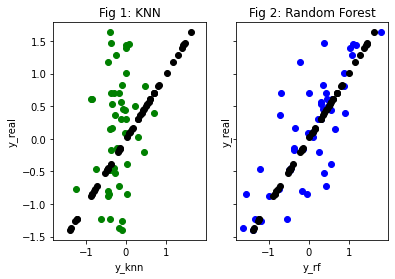

In [104]:
# Crea gráficos y subgráficos
figure_best = plt.figure(figsize=(200,200))
figure_best, axes = plt.subplots(nrows=1,ncols=2, sharex=True, sharey=True)

# Añade los puntos de cada predicción
axes[0].scatter(y_knn,y_real,color = "g")
axes[1].scatter(y_rf,y_real,color = "b")


# Añade la línea base de comparación vs caso ideal (que los valores predichos fueran exactemente iguales a los reales)
# a cada subgráfico.
axes[0].scatter(y_real,y_real,color = "k")
axes[1].scatter(y_real,y_real,color = "k")


# Añade título a cada subgráfico.
axes[0].title.set_text("Fig 1: KNN")
axes[1].title.set_text("Fig 2: Random Forest")


# Añade nombre a los ejes.
axes[0].set_xlabel("y_knn")
axes[0].set_ylabel("y_real")
axes[1].set_xlabel("y_rf")
axes[1].set_ylabel("y_real")


<h2>Análisis de resultados</h2>

<p>La visualización gráfica indica que el modelo Random Forest logra ajustarse de mejor manera a los datos. La nube de datos tiende a formar una línea recta más similar al caso ideal que la obtenida con el algoritmo KNN. Además de la forma, se observa que la mayoría de los datos predichos por el algoritmo KNN se encuentran acotados en valores de y_knn entre -1 y 1, mientras que el algoritmo RF fue capaz de predecir de mejor manera los valores fuera de ese rango. 
En general los valores de R^2 de ambos algoritmos no son muy altos en la predicción (-0.16 y 0.57 para KNN y RF, respectivamente), a pesar de que ambos se ajustaban bien a los datos, lo cual indica que podrían estar sobreajustados. Quizás en un caso real habría que reconsiderar la eliminación de las columnas MarkDown, probar otros parámetros de ajuste o quizás se necesitan otros atributos para predecir de mejor manera el precio del combustible.</p>

In [105]:
# Nota: Algunos de los valores pueden cambiar con cada ejecución del código debido a la aleatoriedad de 
# la generación de set de entrenamiento en los ajustes de los modelos, sin embargo se hizo correr varias veces el código y
# los patrones se mantienen.